# Introduction

## About Python

**Python Overview:** Python is a programming language with roots dating back to 1989 when it was created by Guido van Rossum.
Python's ecosystem extends far beyond the language itself, offering a vibrant community, extensive libraries, and a wealth of third-party packages to enhance your development experience. The reference implementation, CPython, is overseen by the Python Software Foundation and distributed under the Python Software Foundation License, offering a free and open-source solution compatible with the GNU General Public License.

**Python Philosophy**: Python adheres to a philosophy encapsulated in [PEP 20](https://peps.python.org/pep-0020/), emphasizing code readability and the ability to express ideas concisely. 
Achieving proficiency in Python involves both reading and writing code. [PEP 8](https://peps.python.org/pep-0008/) provides essential recommendations for writing Pythonic code.

**Features**: Python is a high-level interpreted programming language allowing rapid development. Python supports various programming paradigms, including object-oriented, imperative, functional, and procedural styles. It boasts dynamic typing, automatic memory management, and a robust standard library. The Python language design is distinguished by its emphasis on readability, simplicity, and explicitness.  Python is also replacing familiar tools like Excel as an [essential skill in the fields of finance and banking](https://www.efinancialcareers.com/news/2021/08/python-for-banking-jobs).


![Image](assets/python_excel.png)


To start writing Python code, you'll need an interpreter. In this course, we will learn Python using [Jupyter Notebooks](https://jupyter.org/) and Google Colab.

**Jupyter Notebooks**: Jupyter Notebooks are an interactive environment that combine code, text, and visuals in a single document. Jupyter Notebooks are a good choice for learning and experimenting with Python because they allow to run code in chunks, making it easy to see the results step by step. 

**Google Colab**: [Colab](https://colab.research.google.com/) is Google's implementation of Jupyter Notebooks. Colab allows to write and execute Python code through the browser, and is especially well suited to machine learning, data analysis and education. Furthermore it requires no setup to use, while providing access free of charge to computing resources including GPUs.



## A short example of data analysis

[FRED](https://fred.stlouisfed.org/) (short for Federal Reserve Economic Data) is an online database consisting of hundreds of thousands of economic data time series from scores of national, international, public, and private sources. FRED is maintained by the Research Department at the Federal Reserve Bank of St. Louis. Below a screenshot of FRED website showing the first two categories time series categories. We will focus on **Money, Banking & Finance** series.



![Image](assets/fred_categories.png)

Say we have some interest in the time series of [Moody's Seasoned Aaa Corporate Bond Yield (AAA)](https://fred.stlouisfed.org/series/AAA/). Is is available as a csv file at url [https://fred.stlouisfed.org/series/AAA/downloaddata/AAA.csv](https://fred.stlouisfed.org/series/AAA/downloaddata/AAA.csv). We will use Python `requests` package to request the data, read it with `pandas` and ploat a graph of the series with `matplotlib`.

First we request the time series from FRED website. We use the package `pandas` that has a method allowing to `read_csv` "files" directly from url

In [120]:
import pandas as pd

url_aaa = 'https://fred.stlouisfed.org/series/AAA/downloaddata/AAA.csv'
aaa_series = pd.read_csv(url_aaa)
aaa_series.tail()

,DATE,VALUE
1251,2023-04-01,4.47
1252,2023-05-01,4.67
1253,2023-06-01,4.65
1254,2023-07-01,4.66
1255,2023-08-01,4.95


Under the hood things are a little bit more complicated

In [121]:
import requests
from io import StringIO

response = requests.get(url_aaa)
print(response.status_code)

# We look at what is inside the http response content
# we get a byte representation of the .csv as string
print(response.content)
print(type(response.content))
aaa_series_byte = response.content

# We decode the byte to a string using the decode() method of bytes
aaa_series_string = aaa_series_byte.decode('UTF-8')

# from documentation, pandas read_csv can read
# filepath_or_buffer: Either a string path to a file,
# url (including http, ftp, and s3 locations),
# or any object with a read method (such as an open file or StringIO)

# we could save aaa_series_string to a .csv file then read it with pandas
# alternatively we put it in a "buffer" (StringIO) and read it directly with pandas
aaa_series_csv = StringIO(aaa_series_string)
aaa_series = pd.read_csv(aaa_series_csv)

aaa_series.tail()

200
b'DATE,VALUE\r\n1919-01-01,5.35\r\n1919-02-01,5.35\r\n1919-03-01,5.39\r\n1919-04-01,5.44\r\n1919-05-01,5.39\r\n1919-06-01,5.40\r\n1919-07-01,5.44\r\n1919-08-01,5.56\r\n1919-09-01,5.60\r\n1919-10-01,5.54\r\n1919-11-01,5.66\r\n1919-12-01,5.73\r\n1920-01-01,5.75\r\n1920-02-01,5.86\r\n1920-03-01,5.92\r\n1920-04-01,6.04\r\n1920-05-01,6.25\r\n1920-06-01,6.38\r\n1920-07-01,6.34\r\n1920-08-01,6.30\r\n1920-09-01,6.22\r\n1920-10-01,6.05\r\n1920-11-01,6.08\r\n1920-12-01,6.26\r\n1921-01-01,6.14\r\n1921-02-01,6.08\r\n1921-03-01,6.08\r\n1921-04-01,6.06\r\n1921-05-01,6.11\r\n1921-06-01,6.18\r\n1921-07-01,6.12\r\n1921-08-01,5.99\r\n1921-09-01,5.93\r\n1921-10-01,5.84\r\n1921-11-01,5.60\r\n1921-12-01,5.50\r\n1922-01-01,5.34\r\n1922-02-01,5.29\r\n1922-03-01,5.23\r\n1922-04-01,5.15\r\n1922-05-01,5.13\r\n1922-06-01,5.08\r\n1922-07-01,5.00\r\n1922-08-01,4.96\r\n1922-09-01,4.93\r\n1922-10-01,4.97\r\n1922-11-01,5.09\r\n1922-12-01,5.08\r\n1923-01-01,5.04\r\n1923-02-01,5.07\r\n1923-03-01,5.13\r\n1923-04-01,

,DATE,VALUE
1251,2023-04-01,4.47
1252,2023-05-01,4.67
1253,2023-06-01,4.65
1254,2023-07-01,4.66
1255,2023-08-01,4.95


It is a good practice and idea to explore briefly what is contained in the variables

In [122]:
print(type(aaa_series))
print(type(aaa_series["DATE"]))
print(aaa_series.dtypes)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
DATE      object
VALUE    float64
dtype: object


Here the column "DATE" of pandas DataFrame is seen as an object (ie a string) so we convert it to a datetime for future use

In [123]:
aaa_series["DATE"] = pd.to_datetime(aaa_series["DATE"])
aaa_series 

,DATE,VALUE
0,1919-01-01,5.35
1,1919-02-01,5.35
2,1919-03-01,5.39
3,1919-04-01,5.44
4,1919-05-01,5.39
...,...,...
1251,2023-04-01,4.47
1252,2023-05-01,4.67
1253,2023-06-01,4.65
1254,2023-07-01,4.66


In [124]:
aaa_series.set_index("DATE").to_csv('../data/aaa_series.csv')

We now plot the data using `matplotlib`

In [125]:
import matplotlib.pyplot as plt

Setting figure size for the rest of the notebook

In [126]:
plt.rc('figure', figsize=(12,6))

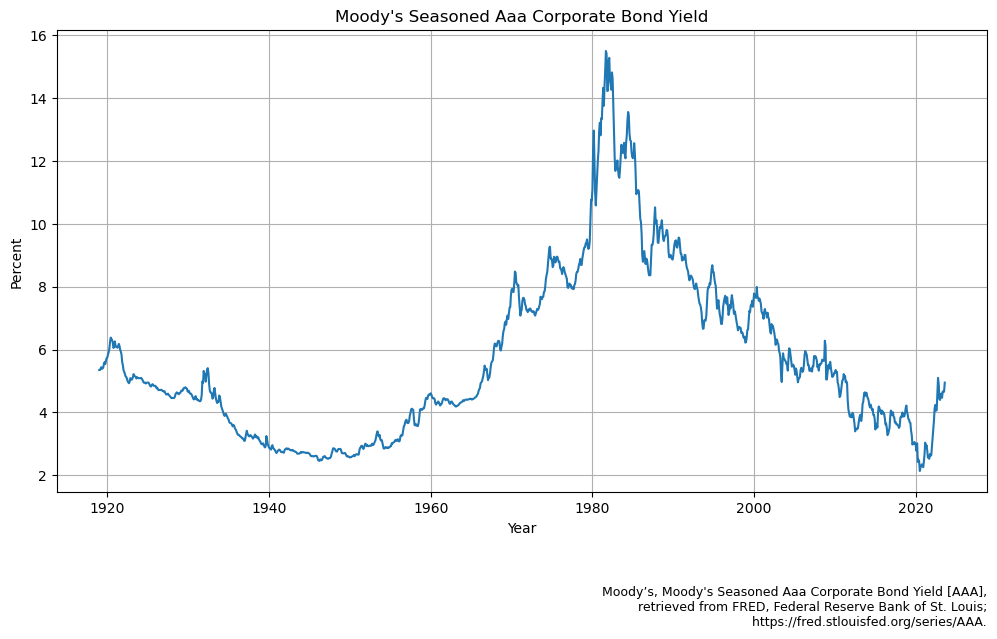

In [127]:

fig, ax = plt.subplots()
ax.plot(aaa_series["DATE"], aaa_series["VALUE"])

ax.set(xlabel='Year', ylabel='Percent',
       title='Moody\'s Seasoned Aaa Corporate Bond Yield')
ax.grid()
# ax.xaxis.set_major_locator(matplotlib.dates.YearLocator(10))

suggested_citation = """Moody’s, Moody's Seasoned Aaa Corporate Bond Yield [AAA],
                     retrieved from FRED, Federal Reserve Bank of St. Louis;
                     https://fred.stlouisfed.org/series/AAA.""" 

ax.annotate(suggested_citation,
             xy = (1.0, -0.25),
             xycoords='axes fraction',
             ha='right',
             va ='center',
             fontsize = 9
)

fig.savefig("moodys_aaa.png")
plt.show()

We might want to add recession periods to enrich the visualization. The NBER (National Bureau of Economic Research) maintains a [chronology of US business cycles](https://www.nber.org/research/business-cycle-dating) through its Business Cycle Dating Committee. It is also available on FRED.  

We get the NBER data from FRED url (series is named "USREC"), it is a monthly series equal to 1 in case of a recession, 0 otherwise.

In [128]:
url_usrec = 'https://fred.stlouisfed.org/series/USREC/downloaddata/USREC.csv'
usrec_series = pd.read_csv(url_usrec, parse_dates=["DATE"])
print(usrec_series.dtypes)
usrec_series.set_index("DATE").to_csv('../data/usrec_series.csv')
usrec_series.tail()

DATE     datetime64[ns]
VALUE             int64
dtype: object


,DATE,VALUE
2020,2023-04-01,0
2021,2023-05-01,0
2022,2023-06-01,0
2023,2023-07-01,0
2024,2023-08-01,0


The NBER chronology identifies the dates of peaks and troughs that frame economic recessions and expansions. A recession is the period between a peak of economic activity and its subsequent trough, or lowest point. We show below the recession periods in grey:

<Axes: xlabel='DATE'>

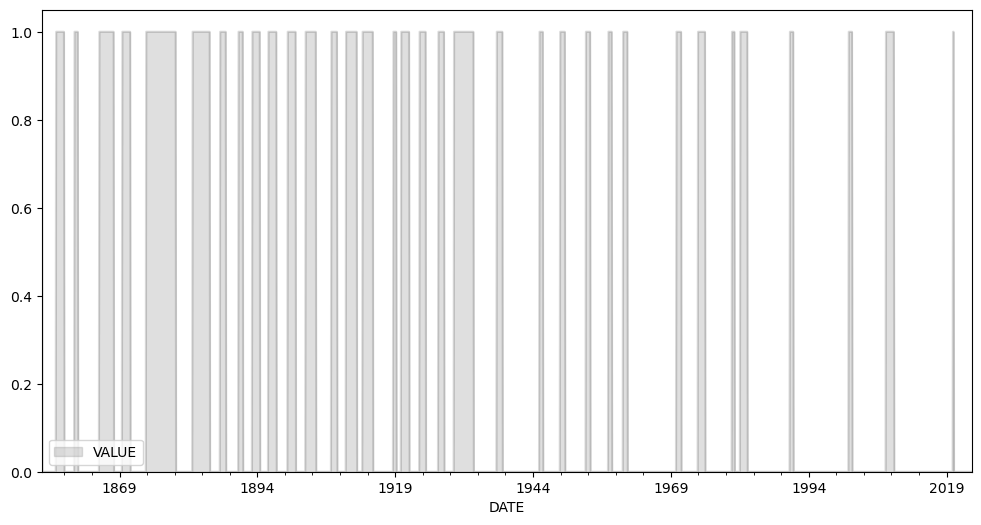

In [129]:
usrec_series.plot.area(x="DATE", color="grey", alpha=0.25)

We then superpose the recession periods to the Moody's series.

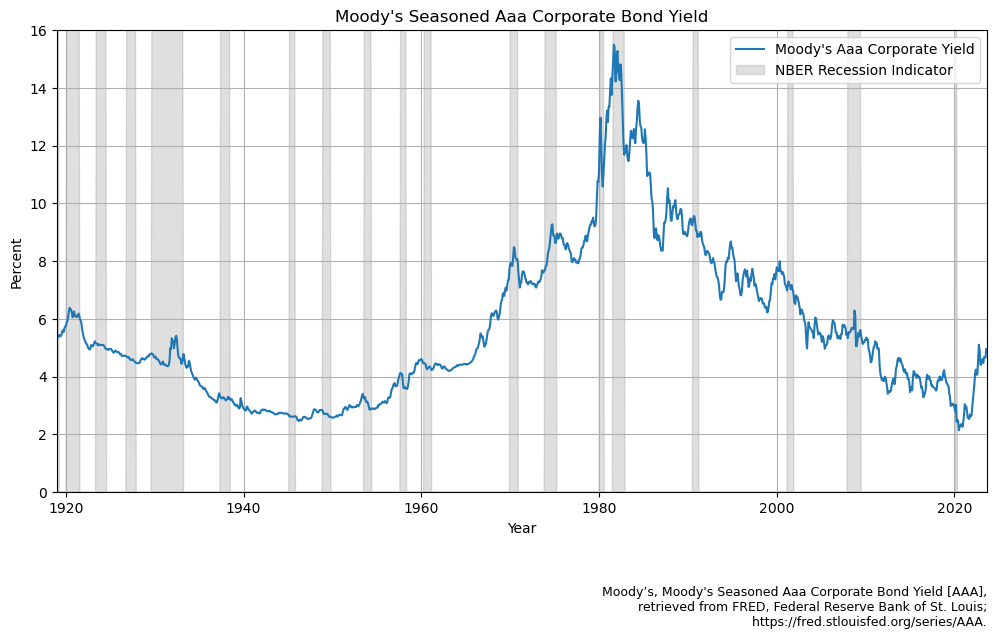

In [130]:
fig, ax = plt.subplots()

ax.plot(aaa_series["DATE"], aaa_series["VALUE"], label="Moody's Aaa Corporate Yield")

# (dirty) We rescale the NBER indicator (0-1) to match the Yield scale
# We want the grey area to occupy the full height of the graph
max_aaa_yield = round(aaa_series["VALUE"].max() + 1)
usrec_series["VALUE"] = usrec_series["VALUE"] * max_aaa_yield
ax.fill_between(usrec_series["DATE"], 0, usrec_series["VALUE"], color="grey", alpha=0.25, label="NBER Recession Indicator")

ax.legend()
ax.set(xlabel='Year', ylabel='Percent',
       title='Moody\'s Seasoned Aaa Corporate Bond Yield')
ax.grid()
# ax.xaxis.set_major_locator(matplotlib.dates.YearLocator(10))

suggested_citation = """Moody’s, Moody's Seasoned Aaa Corporate Bond Yield [AAA],
                     retrieved from FRED, Federal Reserve Bank of St. Louis;
                     https://fred.stlouisfed.org/series/AAA.""" 

ax.annotate(suggested_citation,
             xy = (1.0, -0.25),
             xycoords='axes fraction',
             ha='right',
             va ='center',
             fontsize = 9
)

ax.set_xlim(left = pd.Timestamp('1919-01-01'), right = pd.Timestamp('2023-09-01'))
ax.set_ylim(0, max_aaa_yield)

fig.savefig("assets/moodys_aaa.png")
plt.show()

Now we request multiple time series at once to build a more interesting analysis.

We are getting 4 series, in order to display two spreads between market yields

In [131]:
import numpy as np

list_series_names = ['AAA', 'BAA', 'DGS30', 'MORTGAGE30US']
list_series = []

for series in list_series_names:
    url_series = f'https://fred.stlouisfed.org/series/{series}/downloaddata/{series}.csv'
    data_series = pd.read_csv(url_series, parse_dates=["DATE"])
    data_series = data_series.replace('.', np.NaN)
    data_series["VALUE"] = pd.to_numeric(data_series["VALUE"])
    data_series = data_series.rename(columns={"VALUE":series}).set_index('DATE')
    list_series.append(data_series)

In [132]:
data = pd.concat(list_series, axis=1, join='outer')
data.to_csv('../data/data_fred.csv')
print(data.dtypes)
print(data.index.dtype)

AAA             float64
BAA             float64
DGS30           float64
MORTGAGE30US    float64
dtype: object
datetime64[ns]


Mortgage and Treasury bond time series are daily while Moody's yields are monthly, so we allign everything to monthly

In [133]:
data_monthly = data[list_series_names].resample('M').mean().dropna().sort_index()
data_monthly.head()

,AAA,BAA,DGS30,MORTGAGE30US
DATE,,,,
1977-02-28,8.04,9.12,7.754444,8.6700
1977-03-31,8.10,9.12,7.796087,8.6875
1977-04-30,8.04,9.07,7.734500,8.7520
1977-05-31,8.05,9.01,7.798095,8.8275
1977-06-30,7.95,8.91,7.635909,8.8575


We create new columns containing the spreads  Moody's Aaa - Baa and 30Y mortgage rates - treasury bonds

In [134]:
data_monthly["aaa_baa_spread"] = (data_monthly["BAA"]
                                          - data_monthly["AAA"])
data_monthly["mortgage_treasury_spread"] = (data_monthly["MORTGAGE30US"]
                                           - data_monthly["DGS30"]) 
data_monthly.head()

,AAA,BAA,DGS30,MORTGAGE30US,aaa_baa_spread,mortgage_treasury_spread
DATE,,,,,,
1977-02-28,8.04,9.12,7.754444,8.6700,1.08,0.915556
1977-03-31,8.10,9.12,7.796087,8.6875,1.02,0.891413
1977-04-30,8.04,9.07,7.734500,8.7520,1.03,1.017500
1977-05-31,8.05,9.01,7.798095,8.8275,0.96,1.029405
1977-06-30,7.95,8.91,7.635909,8.8575,0.96,1.221591


In [135]:
data_monthly.to_csv('../data/data_monthly.csv')

We zoom on the 2002/2014 period

In [136]:
date_min = pd.Timestamp('2002-05-01')
date_max = pd.Timestamp('2014-04-01')
data_monthly = data_monthly.loc[date_min:date_max]


We create a nice visualization ready for your boss who is asking what happenend between 2002 and 2014 in the US:

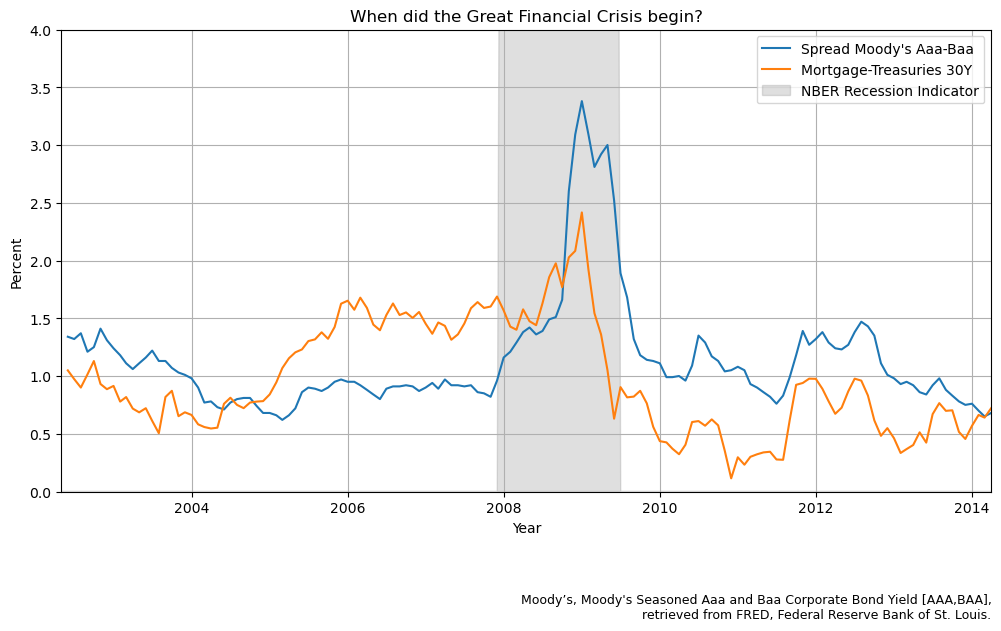

In [137]:
fig, ax = plt.subplots()

ax.plot(data_monthly["aaa_baa_spread"],
        label = "Spread Moody's Aaa-Baa")
ax.plot(data_monthly["mortgage_treasury_spread"],
        label = "Mortgage-Treasuries 30Y")
ax.fill_between(usrec_series["DATE"], 0, usrec_series["VALUE"],
                color="grey", alpha=0.25, label = "NBER Recession Indicator")


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set(xlabel='Year', ylabel='Percent',
       title='When did the Great Financial Crisis begin?')
ax.grid()
ax.legend()
suggested_citation = """Moody’s, Moody's Seasoned Aaa and Baa Corporate Bond Yield [AAA,BAA],
                     retrieved from FRED, Federal Reserve Bank of St. Louis.""" 
ax.annotate(suggested_citation,
             xy = (1.0, -0.25),
             xycoords='axes fraction',
             ha='right',
             va ='center',
             fontsize = 9
)

ax.set_xlim(date_min, date_max)
max_yield = round(max(data_monthly["aaa_baa_spread"].max(),
                          data_monthly["mortgage_treasury_spread"].max()) + 1)
ax.set_ylim(0, max_yield)

fig.savefig('assets/crisis_spreads.png')
plt.show()

Inspired from the FRED blog post below:

[Example blog post](https://fredblog.stlouisfed.org/2014/05/dating-the-financial-crisis-using-fixed-income-markets-yields-spreads/)  from FRED using fixed income market spreads to date the Great Financial Crisis 


![Image](assets/fred_blog_gfc.png)

My problem from [introductory slides](https://www.ecb.europa.eu/stats/policy_and_exchange_rates/key_ecb_interest_rates/html/index.en.html):

In [138]:

url_ecb = 'https://www.ecb.europa.eu/stats/policy_and_exchange_rates/key_ecb_interest_rates/html/index.en.html'

key_rates_html = requests.get(url_ecb)


![Image](assets/key_ecb_rates.png)

Almost good using pandas:

In [139]:
dfs = pd.read_html(url_ecb)
df = dfs[0]
df

Date (with effect from)  \
                                   Unnamed: 0_level_1   
0                                                2023   
1                                                2023   
2                                                2023   
3                                                2023   
4                                                2023   
..                                                ...   
56                                                NaN   
57                                                NaN   
58                                                NaN   
59    (interest rate levels in percentages per annum)   
60  Prior to 10 March 2004, changes to the interes...   

                                                       \
                                   Unnamed: 1_level_1   
0                                             20 Sep.   
1                                              2 Aug.   
2                                             21 Jun.   
3                                              10 May   
4                                             22 Mar.   
..                                                ...   
56                                            22 Jan.   
57                                           4 Jan. 1   
58                                             1 Jan.   
59    (interest rate levels in percentages per annum)   
60  Prior to 10 March 2004, changes to the interes...   

                                     Deposit facility  \
                                   Unnamed: 2_level_1   
0                                                4.00   
1                                                3.75   
2                                                3.50   
3                                                3.25   
4                                                3.00   
..                                                ...   
56                                               2.00   
57                                               2.75   
58                                               2.00   
59    (interest rate levels in percentages per annum)   
60  Prior to 10 March 2004, changes to the interes...   

                          Main refinancing operations  \
                        Fixed rate tenders Fixed rate   
0                                                4.50   
1                                                4.25   
2                                                4.00   
3                                                3.75   
4                                                3.50   
..                                                ...   
56                                               3.00   
57                                               3.00   
58                                               3.00   
59    (interest rate levels in percentages per annum)   
60  Prior to 10 March 2004, changes to the interes...   

                                                       \
               Variable rate tenders Minimum bid rate   
0                                                   -   
1                                                   -   
2                                                   -   
3                                                   -   
4                                                   -   
..                                                ...   
56                                                  -   
57                                                  -   
58                                                  -   
59    (interest rate levels in percentages per annum)   
60  Prior to 10 March 2004, changes to the interes...   

                            Marginal lending facility  
                                   Unnamed: 5_level_1  
0                                                4.75  
1                                                4.50  
2                                                4.25  
3                                       

A good exercise is to do the job manually, selecting exactly what we want:

![Image](assets/key_ecb_rates_console.png)


Beautiful Soup is a library that makes it "easy" to scrape information from web pages:

In [140]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(key_rates_html.content)
# print(soup)

Finding all tags `<table>` in document:

In [141]:
main_block = soup.find_all('table')
# main_block[0]

Finding rows (`<tr>`) within the table body (`<tbody>`):

In [142]:
table_body = main_block[0].find_all('tbody')[0]
table_tr = table_body.find_all('tr')

Filling a dataframe object with data from ECB website:

In [143]:
df = pd.DataFrame(columns=['Year',
                           'DayMonth', 
                           'Deposit',
                           'MRO fixed',
                           'MRO float',
                           'Marginal'])

Dealing with "dirty" data:

In [144]:
for line in table_tr:
    columns = line.find_all('td')

    if(columns != []):
        year = columns[0].text.strip()
        date = columns[1].text.strip().split(".", 1)[0]

        # ECB web developers use Unicode 8722 character for minus '−'
        # number = '−0.5'
        # print(ord(number[0]))  # 8722
        # float(number)  # ValueError: could not convert string to float: '−0.5'

        # while python / pandas expects Unicode 45
        # number = '-0.5'
        # print(ord(number[0]))  # 45
        # float(number)  # -0.5

        deposit = columns[2].text.strip().replace(chr(8722), chr(45))
        mro_fix = columns[3].text.strip().replace(chr(45), "").replace(chr(8722), chr(45))
        mro_float = columns[4].text.strip().replace(chr(45), "").replace(chr(8722), chr(45))
        marginal = columns[5].text.strip().replace(chr(8722), chr(45))

        df = pd.concat([df,pd.DataFrame({'Year': year,
                        'DayMonth': date, 
                        'Deposit': deposit,
                        'MRO fixed': mro_fix,
                        'MRO float': mro_float,
                        'Marginal': marginal}, index=[0])],
                        ignore_index=True)


In [145]:
df.head()

,Year,DayMonth,Deposit,MRO fixed,MRO float,Marginal
0,2023,20 Sep,4.00,4.50,,4.75
1,2023,2 Aug,3.75,4.25,,4.50
2,2023,21 Jun,3.50,4.00,,4.25
3,2023,10 May,3.25,3.75,,4.00
4,2023,22 Mar,3.00,3.50,,3.75


Dealing with missing data:

In [146]:
df.tail()

,Year,DayMonth,Deposit,MRO fixed,MRO float,Marginal
54,1999,5 Nov,2.00,3.00,,4.00
55,,9 Apr,1.50,2.50,,3.50
56,,22 Jan,2.00,3.00,,4.50
57,,4 Jan,2.75,3.00,,3.25
58,,1 Jan,2.00,3.00,,4.50


We fill the missing data in Date column by propagating the last valid Date observation to next valid:

In [147]:
df.loc[df.Year=='','Year'] = np.nan
df['Year']  = df['Year'].ffill()

df['Date'] = df['Year'] + " " + df['DayMonth']
df.tail()

,Year,DayMonth,Deposit,MRO fixed,MRO float,Marginal,Date
54,1999,5 Nov,2.00,3.00,,4.00,1999 5 Nov
55,1999,9 Apr,1.50,2.50,,3.50,1999 9 Apr
56,1999,22 Jan,2.00,3.00,,4.50,1999 22 Jan
57,1999,4 Jan,2.75,3.00,,3.25,1999 4 Jan
58,1999,1 Jan,2.00,3.00,,4.50,1999 1 Jan


Between June 2000 and July 2008 the main refinancing operations (MRO) of the Eurosystem were conducted as variable rate tenders versus at fixed rate before and after. We create a new colum MRO to combine the two periods:

In [148]:
df.loc[df['MRO fixed']=='','MRO fixed'] = np.nan
df.loc[df['MRO float']=='','MRO float'] = np.nan
df['MRO'] = df['MRO fixed'].combine_first(df['MRO float'])
df.loc[28:32,['Year', 'DayMonth', 'MRO fixed', 'MRO float', 'MRO']]

,Year,DayMonth,MRO fixed,MRO float,MRO
28,2008,15 Oct,3.75,NaN,3.75
29,2008,9 Oct,NaN,NaN,NaN
30,2008,8 Oct,NaN,NaN,NaN
31,2008,9 Jul,NaN,4.25,4.25
32,2007,13 Jun,NaN,4.00,4.00


In [149]:
df[['Deposit','MRO','Marginal']] = df[['Deposit','MRO','Marginal']].apply(pd.to_numeric, errors='coerce')

In [150]:
df.loc[df.MRO=='','MRO'] = np.nan
df['MRO']  = df['MRO'].ffill()
df.loc[28:32,['Year', 'DayMonth', 'MRO fixed', 'MRO float', 'MRO']]

,Year,DayMonth,MRO fixed,MRO float,MRO
28,2008,15 Oct,3.75,NaN,3.75
29,2008,9 Oct,NaN,NaN,3.75
30,2008,8 Oct,NaN,NaN,3.75
31,2008,9 Jul,NaN,4.25,4.25
32,2007,13 Jun,NaN,4.00,4.00


In [151]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y %d %b')
df.head()

,Year,DayMonth,Deposit,MRO fixed,MRO float,Marginal,Date,MRO
0,2023,20 Sep,4.00,4.50,NaN,4.75,2023-09-20,4.50
1,2023,2 Aug,3.75,4.25,NaN,4.50,2023-08-02,4.25
2,2023,21 Jun,3.50,4.00,NaN,4.25,2023-06-21,4.00
3,2023,10 May,3.25,3.75,NaN,4.00,2023-05-10,3.75
4,2023,22 Mar,3.00,3.50,NaN,3.75,2023-03-22,3.50


Plotting the "classic" ECB graph:

<Axes: xlabel='Date'>

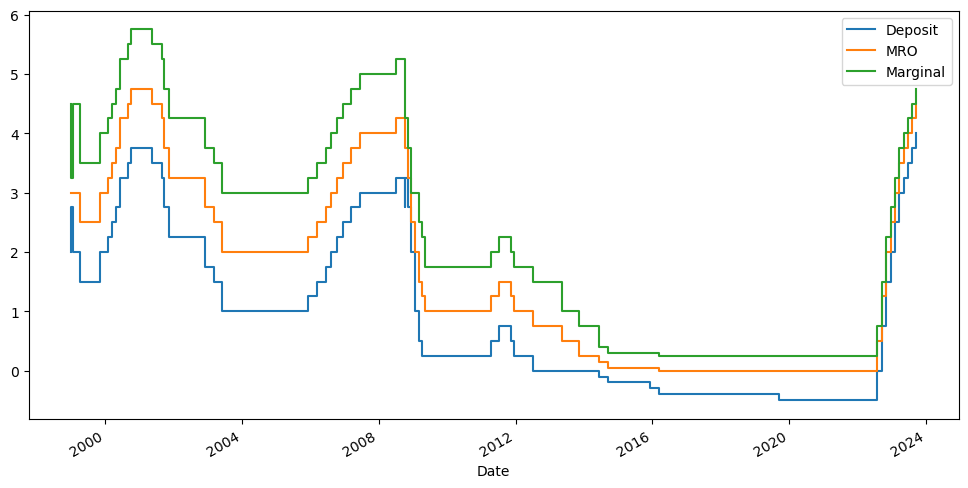

In [152]:
df.plot(x='Date', y=['Deposit', 'MRO', 'Marginal'], drawstyle='steps-post')

![Image](assets/key_ecb_rates_fred.png)

Allowing you to challenge or nuance news headlines based on data:

![Image](assets/ecb_ath.png)

That's only true for the Deposit rate:

<Axes: xlabel='Date'>

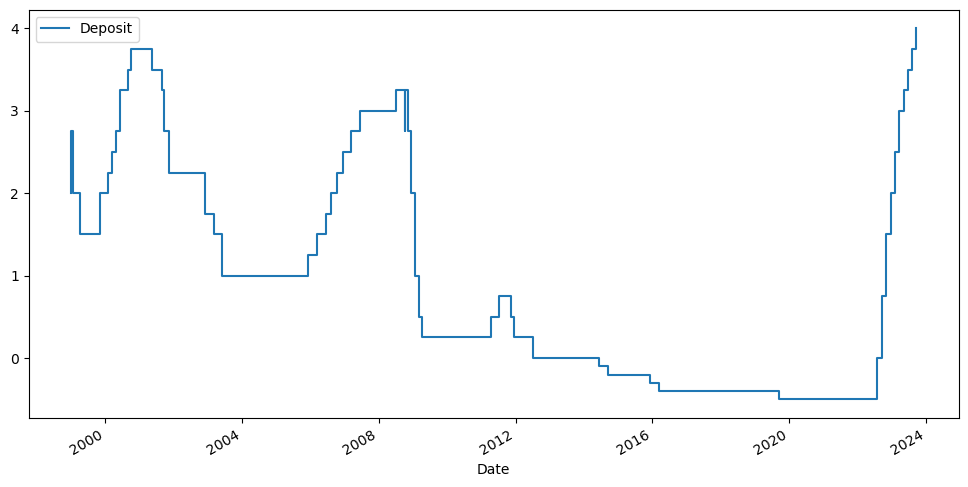

In [153]:
df.plot(x='Date', y='Deposit', drawstyle='steps-post')

This was just to whet your appetite, we won't use `pandas` and `matplotlib` anymore in this lesson and go back to the Python core language. 

# Back to basics: Python is a programming language

## Acknowlegment

This Notebook borrows heavily from the excellent `Practical Python Programming` course by [David Beazley](https://dabeaz-course.github.io/practical-python/) licensed under  under a [Creative Commons Attribution-ShareAlike 4.0 International License](https://creativecommons.org/licenses/by-sa/4.0/). It is complemented with examples from the [Python Tutorial](https://docs.python.org/3/tutorial/) and personal rewriting and has been adapted to the Jupyter Notebook environment.



## Variables and assignment

An assignment statement creates a symbolic name that you can use to reference an object. Said differently a variable is a name that refers to a value. A value represents an object of some type.

The statement below assigns the string object `"Hello, World!"` to the variable (or name) `sentence`:

In [154]:
sentence = "Hello, World!"
sentence

'Hello, World!'

In [155]:
a = 'abc'

You can reuse later the variable for example printing it

In [156]:
print(sentence)

Hello, World!


The command below is specific to IPython and Jupyter notebooks. It lists the variables you have declared: 

In [157]:
%who

BeautifulSoup	 PROTECTEDSENTENCE	 StringIO	 a	 aaa_series	 aaa_series_byte	 aaa_series_csv	 aaa_series_string	 ax	 
columns	 data	 data_monthly	 data_series	 date	 date_max	 date_min	 deposit	 df	 
dfs	 fig	 key_rates_html	 keyword	 line	 list_series	 list_series_names	 main_block	 marginal	 
max_aaa_yield	 max_yield	 mro_fix	 mro_float	 np	 pd	 plt	 requests	 response	 
sentence	 series	 soup	 suggested_citation	 table_body	 table_tr	 url_aaa	 url_ecb	 url_series	 
url_usrec	 usrec_series	 year	 zob	 


Like %who, but gives some extra information about each variable:

In [158]:
%whos

Variable             Type             Data/Info
-----------------------------------------------
BeautifulSoup        type             <class 'bs4.BeautifulSoup'>
PROTECTEDSENTENCE    str              Go to hell
StringIO             type             <class '_io.StringIO'>
a                    str              abc
aaa_series           DataFrame                   DATE  VALUE\n0<...>\n[1256 rows x 2 columns]
aaa_series_byte      bytes            b'DATE,VALUE\r\n1919-01-0<...>6\r\n2023-08-01,4.95\r\n'
aaa_series_csv       StringIO         <_io.StringIO object at 0x12e8524d0>
\n2023-08-01,4.95.>4.66r              DATE,VALUE
ax                   Axes             Axes(0.125,0.11;0.775x0.77)
columns              ResultSet        [<td class="number"> </td<...>class="number">4.50</td>]
data                 DataFrame                     AAA   BAA  D<...>n[13315 rows x 4 columns]
data_monthly         DataFrame                     AAA   BAA   <...>n\n[143 rows x 6 columns]
data_series          DataF

You can obtain help or information on this so-called [magic commands](https://ipython.readthedocs.io/en/stable/interactive/magics.html) type: 

In [159]:
who?

Docstring:
Print all interactive variables, with some minimal formatting.

If any arguments are given, only variables whose type matches one of
these are printed.  For example::

  %who function str

will only list functions and strings, excluding all other types of
variables.  To find the proper type names, simply use type(var) at a
command line to see how python prints type names.  For example:

::

  In [1]: type('hello')
  Out[1]: <type 'str'>

indicates that the type name for strings is 'str'.

``%who`` always excludes executed names loaded through your configuration
file and things which are internal to IPython.

This is deliberate, as typically you may load many modules and the
purpose of %who is to show you only what you've manually defined.

Examples
--------

Define two variables and list them with who::

  In [1]: alpha = 123

  In [2]: beta = 'test'

  In [3]: %who
  alpha   beta

  In [4]: %who int
  alpha

  In [5]: %who str
  beta
File:      ~/miniconda3/envs/teaching-py

Some rules on variables assignment:

- it must start with a letter or an underscore

- the remaining characters consist of letters, numbers and underscores

And conventions (improving coding style): 

- use a single space around assignment operator `=`

- use **snake_case** for variable names (All lowercase, underscores between words)

- prefer the use of informative variable names

You can reassign a variable if needed

In [160]:
sentence = "Hello, I'm Louis!"
sentence

"Hello, I'm Louis!"

You might see in some codes variables assigned with CAPITAL letters.
It is a convention for a constant, a variable whose value should stay the same throughout the life of a program. 

Python doesn’t have built-in constant types, but Python programmers use all capital letters to indicate a variable should be treated as a constant and never be changed:

In [161]:
PROTECTEDSENTENCE = "Do not touch!"
PROTECTEDSENTENCE

'Do not touch!'

However, it does not actually prevent reassignment:

In [162]:
PROTECTEDSENTENCE = 'Go to hell'
PROTECTEDSENTENCE

'Go to hell'

The following identifiers are used as [reserved words](https://docs.python.org/3/reference/lexical_analysis.html#keywords), or *keywords* of the language, and cannot be used as variable name:

<table type="text/css">
  <tr>
      <td><code>False</code></td>
      <td><code>await</code></td>
      <td><code>else</code></td>
      <td><code>import</code></td>
      <td><code>pass</code></td>
  </tr>
  <tr>
      <td><code>None</code></td>
      <td><code>break</code></td>
      <td><code>except</code></td>
      <td><code>in</code></td>
      <td><code>raise</code></td>
  </tr>
  <tr>
      <td><code>True</code></td>
      <td><code>class</code></td>
      <td><code>finally</code></td>
      <td><code>is</code></td>
      <td><code>return</code></td>
  </tr>
  <tr>
      <td><code>and</code></td>
      <td><code>continue</code></td>
      <td><code>for</code></td>
      <td><code>lambda</code></td>
      <td><code>try</code></td>
  </tr>    
  <tr>
      <td><code>as</code></td>
      <td><code>def</code></td>
      <td><code>from</code></td>
      <td><code>nonlocal</code></td>
      <td><code>while</code></td>
  </tr>    
    <tr>
      <td><code>assert</code></td>
      <td><code>del</code></td>
      <td><code>global</code></td>
      <td><code>not</code></td>
      <td><code>with</code></td>
  </tr>    
    <tr>
      <td><code>async</code></td>
      <td><code>elif</code></td>
      <td><code>if</code></td>
      <td><code>or</code></td>
      <td><code>yield</code></td>
  </tr>    
</table>

In [163]:
import keyword
print(sorted(keyword.kwlist))


['False', 'None', 'True', 'and', 'as', 'assert', 'async', 'await', 'break', 'class', 'continue', 'def', 'del', 'elif', 'else', 'except', 'finally', 'for', 'from', 'global', 'if', 'import', 'in', 'is', 'lambda', 'nonlocal', 'not', 'or', 'pass', 'raise', 'return', 'try', 'while', 'with', 'yield']


In [165]:
maturity = 10
yield = 3.5

SyntaxError: assignment to yield expression not possible (1719348490.py, line 2)

Each variable as a type that you can access using `type()` (we already used it with FRED series):

In [166]:
type(sentence)

str

For exemple `sentence` is of type `string` (or `str`) and 1 is of type `int`

In [167]:
type(1)

int

## Python / Jupyter notebook as a calculator / scratchpad

Play around with cells using Python as a calculator, for example:

In [ ]:
1 + 1

2

In [ ]:
(3 * 6) / 5

3.6

#### Exercise 

Use the notebook cells to solve the following problem:

Say you bought 10 shares of Tesla stock at a price of $29.53 per
share on 3 January 2020. 
And you sold them at $407.36 on 5 November 2021. 

What is your profit? 

Store the key elements of the problem in variables using informative names:

In [ ]:
# YOUR CODE HERE

In [ ]:
#| code-fold: true


3778.3

**help()**


The Python interpreter has a number of functions and types built into it that are always available the so-called [Built-in functions](https://docs.python.org/3/library/functions.html)

Use the `help()` command to get help on the `print()` function. Then use
`help()` to get help on the `type()` and `print()` functions. 

Type `help()` just by itself with no value to enter the interactive help viewer.

If that doesn’t work, you’ll have to turn to an internet search:

Python documentation: Go to [http://docs.python.org](http://docs.python.org) and find the documentation for the `dir()` function.

Otherwise: search Google, stackoverflow or ask ChatGPt

In [ ]:
help(min)

Help on built-in function min in module builtins:

min(...)
    min(iterable, *[, default=obj, key=func]) -> value
    min(arg1, arg2, *args, *[, key=func]) -> value
    
    With a single iterable argument, return its smallest item. The
    default keyword-only argument specifies an object to return if
    the provided iterable is empty.
    With two or more arguments, return the smallest argument.



In [ ]:
help(type)

Help on class type in module builtins:

class type(object)
 |  type(object_or_name, bases, dict)
 |  type(object) -> the object's type
 |  type(name, bases, dict) -> a new type
 |  
 |  Methods defined here:
 |  
 |  __call__(self, /, *args, **kwargs)
 |      Call self as a function.
 |  
 |  __delattr__(self, name, /)
 |      Implement delattr(self, name).
 |  
 |  __dir__(self, /)
 |      Specialized __dir__ implementation for types.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __init__(self, /, *args, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __instancecheck__(self, instance, /)
 |      Check if an object is an instance.
 |  
 |  __repr__(self, /)
 |      Return repr(self).
 |  
 |  __setattr__(self, name, value, /)
 |      Implement setattr(self, name, value).
 |  
 |  __sizeof__(self, /)
 |      Return memory consumption of the type object.
 |  
 |  __subclasscheck__(self, subclass, /)
 |     

# Built-in types




Python built-in Types are defined [here](https://docs.python.org/3/library/stdtypes.html)

We present below the most commons: Numbers, Sequences (including Strings and data structures), and other Data Structures (Dictionnaries, Set).

## Numbers

### Types of Numbers

Python has 4 types of numbers:

* Booleans
* Integers
* Floating point
* Complex (imaginary numbers)

We will briefly decribe the first three types


### Booleans (bool)

Booleans have two values: `True`, `False`.


In [ ]:
a = True
b = False

Numerically, they're evaluated as integers with value `1`, `0`.

In [ ]:

c = 4 + True # 5
print(c)
d = False
d == 0

5


True

#### None

An object frequently used to represent the absence of a value, as when default arguments are not passed to a function. Assignments to None are illegal and raise a SyntaxError. None is the sole instance of the NoneType type.

In [ ]:
a = None
print(type(a))

a

<class 'NoneType'>



### Integers (int)

Signed values of arbitrary size and base:


In [ ]:
a = 37
print(a)

b = -3
print(b)

c = 0x7fa8      # Hexadecimal
print(c)

d = 0b10001111  # Binary
print(d)

37
-3
32680
143


You can retrieve the hexadecimal or binary respresentation of an integer using built-in functions `hex()` or `bin()`

In [ ]:
help(hex)

Help on built-in function hex in module builtins:

hex(number, /)
    Return the hexadecimal representation of an integer.
    
    >>> hex(12648430)
    '0xc0ffee'



In [ ]:
hex(c)

'0x7fa8'

In [ ]:
help(bin)

Help on built-in function bin in module builtins:

bin(number, /)
    Return the binary representation of an integer.
    
    >>> bin(2796202)
    '0b1010101010101010101010'



In [ ]:
bin(d)

'0b10001111'


Common operations:

```
x + y      Add
x - y      Subtract
x * y      Multiply
x / y      Divide (produces a float)
x // y     Floor Divide (produces an integer)
x % y      Modulo (remainder)
x ** y     Power
abs(x)     Absolute value

not that common
x << n     Bit shift left
x >> n     Bit shift right
x & y      Bit-wise AND
x | y      Bit-wise OR
x ^ y      Bit-wise XOR
~x         Bit-wise NOT
```

In [ ]:
print(d)
print(bin(d))

print(d << 3)
print(bin(d << 3))

print(d >> 3)
print(bin(d >> 3))

143
0b10001111
1144
0b10001111000
17
0b10001



### Floating point (float)

Use a decimal or exponential notation (very usefull for big numbers) to specify a floating point value:


In [ ]:
a = 37.45
b = 4e5 # 4 x 10**5 or 400,000
c = -1.345e-10



Floats are represented as double precision using the native CPU representation [IEEE 754](https://en.wikipedia.org/wiki/IEEE_754).
This is the same as the `double` type in the programming language C.

> 17 digits of precision  
> Exponent from -308 to 308



Be aware that floating point numbers are inexact when representing decimals.


In [ ]:
a = 2.1 + 4.2
a == 6.3


False

In [ ]:
a

6.300000000000001


This is not specific to Python, but this is a real subject, see for example the crash of [Ariane 5 first flight in 1996](https://webusers.imj-prg.fr/~michel.waldschmidt/articles/pdf/Ariane5VI.pdf):

[https://en.wikipedia.org/wiki/Ariane_5](https://en.wikipedia.org/wiki/Ariane_5)

Ariane 5’s first test flight (Ariane 5 Flight 501) on 4 June 1996 failed, with the rocket self-destructing 37 seconds after launch because of a malfunction in the control software.
A data conversion from 64-bit floating point value to 16-bit signed integer value to be stored in a variable representing horizontal bias caused a processor trap (operand error) because the floating point value was too large to be represented by a 16-bit signed integer.


Python implemented a module to deal with decimals, `decimal`. It can be usefull if it is critical for you to have correct precision (for example in banking, accounting etc)

In [ ]:
import decimal
a = decimal.Decimal('2.1')
b = decimal.Decimal('4.2')

print(a + b == 6.3)
print(a + b == decimal.Decimal('6.3'))
a + b

False
True


Decimal('6.3')


Common Operations:

```
x + y      Add
x - y      Subtract
x * y      Multiply
x / y      Divide
x // y     Floor Divide or Integer Divide
x % y      Modulo
x ** y     Power
abs(x)     Absolute Value
```

These are the same operators as Integers, except for the bit-wise operators.

In [ ]:
print(17 / 4)

print(17 // 4)

print(17 % 4)

print(4 * (17 // 4) + 17 % 4)

4.25
4
1
17







Additional math functions are found in the `math` module.


In [ ]:
import math

x = 2.5

a = math.sqrt(x)
print(a)
b = math.sin(x)
print(b)
c = math.cos(x)
print(c)
d = math.log(x)
print(d)

1.5811388300841898
0.5984721441039564
-0.8011436155469337
0.9162907318741551


In [ ]:
dir(math)

['__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'acos',
 'acosh',
 'asin',
 'asinh',
 'atan',
 'atan2',
 'atanh',
 'ceil',
 'comb',
 'copysign',
 'cos',
 'cosh',
 'degrees',
 'dist',
 'e',
 'erf',
 'erfc',
 'exp',
 'expm1',
 'fabs',
 'factorial',
 'floor',
 'fmod',
 'frexp',
 'fsum',
 'gamma',
 'gcd',
 'hypot',
 'inf',
 'isclose',
 'isfinite',
 'isinf',
 'isnan',
 'isqrt',
 'lcm',
 'ldexp',
 'lgamma',
 'log',
 'log10',
 'log1p',
 'log2',
 'modf',
 'nan',
 'nextafter',
 'perm',
 'pi',
 'pow',
 'prod',
 'radians',
 'remainder',
 'sin',
 'sinh',
 'sqrt',
 'tan',
 'tanh',
 'tau',
 'trunc',
 'ulp']

In [ ]:
help(math.floor)

Help on built-in function floor in module math:

floor(x, /)
    Return the floor of x as an Integral.
    
    This is the largest integer <= x.



In [ ]:
print(math.floor(15.4))
print(math.ceil(15.4))

print(int(15.4 // 1))
print(int(15.4 // 1 + 1))

15
16
15
16


### Comparisons

The following comparison / relational operators work with numbers:

```
x < y      Less than
x <= y     Less than or equal
x > y      Greater than
x >= y     Greater than or equal
x == y     Equal to
x != y     Not equal to
```

You can form more complex boolean expressions using

`and`, `or`, `not`

Here are a few examples:


In [ ]:
a = 8
b = 11
c = 16

print(b >= a and b <= c)

print(not (b < a or b > c))


True
True


In [ ]:
x = True
y = False

print(x and y)
print(x and not y)
print(x or y)
print(not x or y)

False
True
True
False



#### Converting Strings to Numbers

The type name can be used to convert values:


In [ ]:
x = 2.5
a = int(x)    # Convert x to integer
b = float(x)  # Convert x to float
print(a)
print(b)

c = '3.14159' # It also works with strings containing numbers
float(c)


2
2.5


3.14159

## Sequences

See [Python documentation](https://docs.python.org/3/library/stdtypes.html#typesseq) for more details.

There are three basic sequence types: lists, tuples, and range objects. 

Additional sequence types tailored for processing of binary data and text strings exist.

We will start first by looking at Strings and then the three basic sequence types.


### Strings (ie Text Sequence)

This section introduces ways to work with text.

#### Representing Literal Text

Textual data in Python is handled with `str` objects, or strings. [Strings](https://docs.python.org/3/library/stdtypes.html#text-sequence-type-str) are immutable sequences of Unicode code points. Strings are written in programs with quotes:


In [ ]:
# Single quote
a = 'allows embedded "double" quotes'
print(a)

# Double quote
b = "allows embedded 'single' quotes"
print(b)

# Triple quotes (usefull for documenting functions)
c = '''
Three single quotes,
Three single quotes,
Three single quotes,
that's right.
'''
print(c)

allows embedded "double" quotes
allows embedded 'single' quotes

Three single quotes,
Three single quotes,
Three single quotes,
that's right.



Triple quoted strings may span multiple lines - all associated whitespace will be included in the string literal.


#### String escape codes

Escape codes are used to represent control characters and characters that can't be easily typed
directly at the keyboard.  Here are some common escape codes:

```
'\n'      Line feed
'\r'      Carriage return
'\t'      Tab
'\''      Literal single quote
'\"'      Literal double quote
'\\'      Literal backslash
```



In [ ]:
a = 'Hello, I\'m Lou\'s father'
print(a)

b = "I quote: \"you are not allowed to smoke here!\""
print(b)

c = "tralala \ntrilili"
print(c)

d = "tralala \ntrilili\r\\trololo\\"
print(d)

Hello, I'm Lou's father
I quote: "you are not allowed to smoke here!"
tralala 
trilili
tralala 
\trololo\


#### String Representation

Each character in a string is stored internally as a so-called Unicode "code-point" which is an integer. More details on Unicode can be found [here](https://docs.python.org/3/howto/unicode.html). You can specify an exact code-point value using the following escape sequences (\N for character name, \u or \U for hexadecimal values):


In [ ]:
a = "\N{GREEK CAPITAL LETTER DELTA}"  # Using the character name
print(a)

b = "\u0394"                          # Using a 16-bit hex value
print(b)

c = "\U00000394"                      # Using a 32-bit hex value
print(c)

Δ
Δ
Δ


Built-in functions `ord()` and `chr()` are also useful to deal with Unicode.

`chr()` built-in function, takes integers and returns a Unicode string of length 1 that contains the corresponding code point. 

The reverse operation is the built-in `ord()`` function that takes a one-character Unicode string and returns the code point value

In [ ]:
help(chr)

Help on built-in function chr in module builtins:

chr(i, /)
    Return a Unicode string of one character with ordinal i; 0 <= i <= 0x10ffff.



In [ ]:
help(ord)

Help on built-in function ord in module builtins:

ord(c, /)
    Return the Unicode code point for a one-character string.



In [ ]:
code_point = ord("\U00000394")
print(code_point)

unicode_string = chr(code_point)
print(unicode_string)

916
Δ


In [ ]:
print("\U00000394=b^2-4a*c")

Δ=b^2-4a*c



The [Unicode Character Database](https://unicode.org/charts) is a reference for all
available character codes. Google is also helpfull.


For example in the [Miscellaneous Symbols](https://www.unicode.org/charts/PDF/U2600.pdf) block, one can find Chess symbols

The white king codepoint is 2654 (hexadecimal):

![Image](assets/chess_unicode_white.png)

In [ ]:
print(int('2654', 16))
print(hex(int('2654', 16)))

print(chr(9812))
print(chr(0x2654))
print("\u2654")

9812
0x2654
♔
♔
♔


![Image](assets/chess_unicode_black.png)

In [ ]:
print(int('265a', 16))
print(int('265A', 16))

print(chr(9818))
print(chr(0x265a))
print("\u265a")

9818
9818
♚
♚
♚


Here is the chess board, we will see later what is done exactly in the code below:

In [ ]:
x="".join([chr(0x265a+n) for n in [2, 4, 3, 1, 0, 3, 4, 2]])
# sequence comprehension + str.join() method
y="".join([chr(0x2654+n) for n in [2, 4, 3, 1, 0, 3, 4, 2]])

print(x)
print(chr(0x265f)*8) # string replication
print(chr(0x2659)*8)
print(y[::-1]) # reverse white king and queen

♜♞♝♛♚♝♞♜
♟♟♟♟♟♟♟♟
♙♙♙♙♙♙♙♙
♖♘♗♔♕♗♘♖



#### String Indexing

Strings work like an array for accessing individual characters. You use an integer index, starting at 0.
Negative indices specify a position relative to the end of the string.


In [31]:
a = 'Hello, World!'
b = a[0]          # 'H'
print(b)
c = a[4]          # 'o'
print(c)
d = a[-1]         # '!' (end of string)
print(d)

H
o
!



You can also slice or select substrings specifying a range of indices with `:`.
The character at the ending index is not included.  Missing indices assume the beginning or ending of the string.


In [32]:
print(a[:5])     # 'Hello'
print(a[6:])     # ' World!'
print(a[3:8])    # 'lo, W'
print(a[-6:])    # 'World!'


Hello
 World!
lo, W
World!


How would you print 'ello'?

In [ ]:
#YOUR CODE HERE

In [33]:
#| code-fold: true
# ello


ello


Below an illustration of string slicing

![Image](assets/list_slicing.png)


#### String operations

Concatenation, length, membership and replication.


In [ ]:
# Concatenation (+)
a = 'Hello' + 'World'   # 'HelloWorld'
print(a)
b = 'Say ' + a          # 'Say HelloWorld'
print(b)

HelloWorld
Say HelloWorld


In [ ]:
# Length (len)
c = 'Hello'
print(len(c))                  # 5


5


In [ ]:
# Membership test (`in`, `not in`)
d = 'e' in c            # True
print(d)
e = 'x' in c            # False
print(e)
f = 'hi' not in c       # True
print(f)

True
False
True


In [ ]:
# Replication (s * n)
print(c * 5)             # 'HelloHelloHelloHelloHello'
print(chr(0x265f) * 8) 


HelloHelloHelloHelloHello
♟♟♟♟♟♟♟♟



#### String methods

Strings have methods that perform various operations with the string data.

Example: stripping any leading / trailing white space.


In [ ]:
s = '  Hello '
s.strip()     # 'Hello'

'Hello'

Example: Case conversion.

In [ ]:
s = 'Hello'
print(s.lower())     # 'hello'
print(s.upper())     # 'HELLO'
print(s.lower().
      capitalize())  # 'Hello'

hello
HELLO
Hello



Example: Replacing text.


In [ ]:
s = 'Hello, World!'
s.replace('Hello' , 'Damned')   # 'Damned, World!'


'Damned, World!'

Remember the problem I had in the introduction with the ECB website

In [168]:
wrong_number = '−0.5'
print(ord(wrong_number[0]))  # 8722
float(wrong_number)  # ValueError: could not convert string to float: '−0.5'


8722


ValueError: could not convert string to float: '−0.5'

In [169]:
correct_number = '-0.5'
print(ord(correct_number[0]))  # 45
float(correct_number)  # -0.5

45


-0.5

In [170]:
corrected_number = wrong_number.replace(chr(8722), chr(45))
float(corrected_number)

-0.5


**More string methods:**

Strings have a wide variety of other methods ([see here](https://docs.python.org/3/library/stdtypes.html#string-methods)) for testing and manipulating the text data.
This is a small sample of methods:

```
s.endswith(suffix)     # Check if string ends with suffix
s.find(t)              # First occurrence of t in s
s.index(t)             # First occurrence of t in s
s.isalpha()            # Check if characters are alphabetic
s.isdigit()            # Check if characters are numeric
s.islower()            # Check if characters are lower-case
s.isupper()            # Check if characters are upper-case
s.join(slist)          # Join a list of strings using s as delimiter
s.lower()              # Convert to lower case
s.replace(old,new)     # Replace text
s.rfind(t)             # Search for t from end of string
s.rindex(t)            # Search for t from end of string
s.split([delim])       # Split string into list of substrings
s.startswith(prefix)   # Check if string starts with prefix
s.strip()              # Strip leading/trailing space
s.upper()              # Convert to upper case
```



#### String Mutability

Strings are "immutable" or read-only.
Once created, the value can't be changed.


In [ ]:
s = 'Hello World'
s[1] = 'a'


TypeError: 'str' object does not support item assignment


**All operations and methods that manipulate string data, always create new strings.**

#### String Conversions

Use `str()` to convert any value to a string. The result is a string holding the
same text that would have been produced by the `print()` statement.


In [ ]:
x = 42
str(x)

'42'


#### Byte Strings

A string of [8-bit bytes](https://docs.python.org/3/library/stdtypes.html#binary-sequence-types-bytes-bytearray-memoryview), commonly encountered with low-level I/O, is written as follows:


In [172]:
data = b'Hello World'
print(type(data))
data

<class 'bytes'>


b'Hello World'


By putting a little b before the first quotation, you specify that it is a byte string as opposed to a text string.

Most of the usual string operations work.


In [173]:
print(len(data))                         # 13
print(data[0:5])                         # b'Hello'
print(data.replace(b'Hello', b'Wonderful'))     # b'Wonderful World\r\n'
print(data)

11
b'Hello'
b'Wonderful World'
b'Hello World'


Be carefull `str.replace()` returns a copy of the string, so you have to assign it to a variable

In [174]:
help(data.replace)

Help on built-in function replace:

replace(old, new, count=-1, /) method of builtins.bytes instance
    Return a copy with all occurrences of substring old replaced by new.
    
      count
        Maximum number of occurrences to replace.
        -1 (the default value) means replace all occurrences.
    
    If the optional argument count is given, only the first count occurrences are
    replaced.



Remember the introductory example:

In [175]:
url_aaa = "https://fred.stlouisfed.org/series/AAA/downloaddata/AAA.csv"
response = requests.get(url_aaa)
# We look at what is inside the http response content
# we get a byte representation of the .csv as string
print(type(response.content))
aaa_series_byte = response.content
aaa_series_byte

<class 'bytes'>


b'DATE,VALUE\r\n1919-01-01,5.35\r\n1919-02-01,5.35\r\n1919-03-01,5.39\r\n1919-04-01,5.44\r\n1919-05-01,5.39\r\n1919-06-01,5.40\r\n1919-07-01,5.44\r\n1919-08-01,5.56\r\n1919-09-01,5.60\r\n1919-10-01,5.54\r\n1919-11-01,5.66\r\n1919-12-01,5.73\r\n1920-01-01,5.75\r\n1920-02-01,5.86\r\n1920-03-01,5.92\r\n1920-04-01,6.04\r\n1920-05-01,6.25\r\n1920-06-01,6.38\r\n1920-07-01,6.34\r\n1920-08-01,6.30\r\n1920-09-01,6.22\r\n1920-10-01,6.05\r\n1920-11-01,6.08\r\n1920-12-01,6.26\r\n1921-01-01,6.14\r\n1921-02-01,6.08\r\n1921-03-01,6.08\r\n1921-04-01,6.06\r\n1921-05-01,6.11\r\n1921-06-01,6.18\r\n1921-07-01,6.12\r\n1921-08-01,5.99\r\n1921-09-01,5.93\r\n1921-10-01,5.84\r\n1921-11-01,5.60\r\n1921-12-01,5.50\r\n1922-01-01,5.34\r\n1922-02-01,5.29\r\n1922-03-01,5.23\r\n1922-04-01,5.15\r\n1922-05-01,5.13\r\n1922-06-01,5.08\r\n1922-07-01,5.00\r\n1922-08-01,4.96\r\n1922-09-01,4.93\r\n1922-10-01,4.97\r\n1922-11-01,5.09\r\n1922-12-01,5.08\r\n1923-01-01,5.04\r\n1923-02-01,5.07\r\n1923-03-01,5.13\r\n1923-04-01,5.22

Indexing is a bit different because it returns byte values as integers.

In [176]:
a = data[0]   # 72 (ASCII code for 'H')
print(a)

b = chr(a)
print(b)

c = ord(b)
print(c)

72
H
72


Contrary to Strings, Bytes do not understand escapes for unicode characters (\u, \U)

In [177]:
unicode_byte = b"tralala\u265atralala"
print(unicode_byte)

unicode_string = "tralala\u265atralala"
print(unicode_string)

b'tralala\\u265atralala'
tralala♚tralala


Conversion to/from text strings.

In [178]:
text = data.decode('utf-8') # bytes -> text
print(text)

data = text.encode('utf-8') # text -> bytes
print(data)

aaa_series_string = aaa_series_byte.decode('utf-8')
print(aaa_series_string[:250])

Hello World
b'Hello World'
DATE,VALUE
1919-01-01,5.35
1919-02-01,5.35
1919-03-01,5.39
1919-04-01,5.44
1919-05-01,5.39
1919-06-01,5.40
1919-07-01,5.44
1919-08-01,5.56
1919-09-01,5.60
1919-10-01,5.54
1919-11-01,5.66
1919-12-01,5.73
1920-01-01,5.75
1920-02-01,5.86




The `'utf-8'` argument specifies a character encoding.  Other common
values include `'ascii'` and `'latin1'`.


#### f-Strings

A string with formatted expression substitution, [see here](https://peps.python.org/pep-0498/) and [here](https://docs.python.org/3/library/string.html#formatstrings). Very handy.


You can use it to build strings from variables (string interpolation):

In [179]:
name = 'IBM'
shares = 100
price = 91.1
a = f'{name} {shares} {price}'

 You can add formating to your variables. For example specify the number of digits 

In [180]:
b = f'Cost = ${shares*price:0.2f}'
b

'Cost = $9110.00'

There are many ways to format strings, for example ensuring a fixed width

In [181]:
variable = "Python 3.9"
print(f"|{variable:15}|")
print(f"|{variable:<15}|")
print(f"|{variable:>15}|")
print(f"|{variable:^15}|")

|Python 3.9     |
|Python 3.9     |
|     Python 3.9|
|  Python 3.9   |


I used f-strings in the introductory example to build urls:

In [ ]:
list_series_names = ['AAA', 'BAA', 'DGS30', 'MORTGAGE30US']

for series in list_series_names:
    url_series = f'https://fred.stlouisfed.org/series/{series}/downloaddata/{series}.csv'
    print(url_series)

https://fred.stlouisfed.org/series/AAA/downloaddata/AAA.csv
https://fred.stlouisfed.org/series/BAA/downloaddata/BAA.csv
https://fred.stlouisfed.org/series/DGS30/downloaddata/DGS30.csv
https://fred.stlouisfed.org/series/MORTGAGE30US/downloaddata/MORTGAGE30US.csv


#### Exercises

In these exercises, you'll experiment with operations on Python's
string type.  

Start by defining a string containing a series of stock tickers like this:


In [34]:
tickers = 'AAPL,IBM,MSFT,YHOO,ORCL'


**Exercise: Extracting individual characters and substrings**

Strings are arrays of characters. Try extracting a few characters (eg. first ,last, etc):


In [ ]:
# YOUR CODE HERE

In [36]:
#| code-fold: true



A
L
AAPL
MSFT
RCL
IBM,MSFT,YHOO,ORCL
AAPL,IBM,MSFT,YHOO,
AP,B,STYO,RL
LR,OYTS,B,PA



**Exercise: String concatenation**

Although string data is read-only, you can always reassign a variable
to a newly created string.

Suppose we execute the following statement which concatenates a new symbol "GOOG" to
the end of `symbols`:


In [191]:

tickers = tickers + 'GOOG'
tickers

'AAPL,IBM,MSFT,YHOO,ORCLGOOG'


Something is wrong. Fix it so that the `tickers` variable holds the value `'AAPL,IBM,MSFT,YHOO,ORCL,GOOG'`.


In [ ]:
# YOUR CODE HERE

In [192]:
#| code-fold: true


AAPL,IBM,MSFT,YHOO,ORCL,GOOG


'AAPL,IBM,MSFT,YHOO,ORCL,GOOG'



Add `'HPQ'` to the front the string:


In [ ]:
# YOUR CODE HERE

In [193]:
#| code-fold: true
tickers = 'HPQ,' + tickers
tickers

'HPQ,AAPL,IBM,MSFT,YHOO,ORCL,GOOG'


In these examples, it might look like the original string is being modified, in an apparent violation of strings being read only.  

This is not the case as operations on strings create an entirely new string each time.

When the variable name `tickers` is reassigned, it points to a newly created string. Afterwards, the old string is destroyed since
it's not being used anymore.



** Exercise: Membership testing (substring testing)**

Experiment with the `in` operator to check for substrings. For example test if `'HPQ'` or `'CAT'` are in `tickers`
What about `'PQ'`?

In [ ]:
# YOUR CODE HERE

In [ ]:
#| code-fold: true


True
True
False



**Exercise: String Methods**

Try experimenting on `tickers` with some of the string methods ([see here](https://docs.python.org/3/library/stdtypes.html#string-methods)).

If you want to save the result of an operation, you need to assign a variable.



In [ ]:
# YOUR CODE HERE

In [194]:
#| code-fold: true


hpq,aapl,ibm,msft,yhoo,orcl,goog
-1
13
True
DELL,AAPL,IBM,MSFT,YHOO,ORCL,GOOG



**Exercise: f-strings**

Using the variables defined for the Tesla exercise:

"Say you bought 10 shares of Tesla stock at a price of $29.53 per
share on 3 January 2020. 

And you sold them at $407.36 on 5 November 2021."

Print

"I bought 10 shares of Tesla at $29.53"

"I sold 10 shares of Tesla at $407.36"

"I can retire"

To do that, use f-strings.

In [ ]:
# YOUR CODE HERE

In [ ]:
#| code-fold: true


I bought 10 shares of Tesla at $29.53
I sold 10 shares of Tesla at $407.36
I can retire



**Exercise: Regular Expressions (Advanced, for later)**

One limitation of the basic string operations is that they don't
support any kind of advanced pattern matching.  For that, you
need to turn to Python's `re` module and regular expressions.

For more information about the `re` module, see the official documentation at
[https://docs.python.org/library/re.html](https://docs.python.org/3/library/re.html) or this [howto](https://docs.python.org/3/howto/regex.html#regex-howto).

Regular expression handling is a big topic, but here is a short
example:

In [ ]:
text = 'Today is 3/27/2018. Tomorrow is 3/28/2018.'

# Find all occurrences of a date
import re
print(re.findall('\\d+/\\d+/\\d+', text))

# Replace all occurrences of a date with replacement text
re.sub('(\\d+)/(\\d+)/(\\d+)', r'\3-\1-\2', text)
'Today is 2018-3-27. Tomorrow is 2018-3-28.'

['3/27/2018', '3/28/2018']


'Today is 2018-3-27. Tomorrow is 2018-3-28.'

As an exercise you can try to modify phone number format to international:

In [ ]:
text = 'My phone number is 0678345612, and Zoe 0789786756'

# Replace in the string above local phone numbers by their international version
# assuming we are in France
# 0678345612 to be replaced by +(33)678345612

In [ ]:
# YOUR CODE HERE

In [ ]:
#| code-fold: true
re.sub('0(\\d{9})', f'+(33)\\1', text)

'My phone number is +(33)678345612, and Zoe +(33)789786756'

Usually sales in banks communicate prices of bonds indicative prices ("runs") to their client via electronic messages (BBG, emails). Such messages usually look like this:

In [ ]:
bbg_message = """RABOBK 5¼ 27 227 / 217
                 RBS 6¾ 21 237 / 222
                 SOCGEN 5.375 18 140 / 130
                 xxx 3,6 250 6,3 ; 6,4
                 UBS 6½ 24 155 / 140
                 BNP 5.5 120 98 / 95"""


Using a regular expression it is feasible to extract fields of interest from this string matching a predefined pattern:

In [ ]:
pattern = re.compile('(?P<ticker>[A-Z]+) (?P<coupon>[0-9]{1,2}(?:[¼½¾]|.[0-9]{1,3})?) (?P<maturity>[0-9]{1,3}) (?P<bid>[0-9]+) [\/] (?P<ask>[0-9]+)')

In the preceding regular expression we have defined (named) groups of interest between parenthesis. 

In case there are multiple groups in the regex, for each match of the pattern in a string, `findall` returns a tuple of strings matching the groups. Each match of the pattern is the item of a list:

In [ ]:
list_runs = re.findall(pattern, bbg_message)
list_runs

[('RABOBK', '5¼', '27', '227', '217'),
 ('RBS', '6¾', '21', '237', '222'),
 ('SOCGEN', '5.375', '18', '140', '130'),
 ('UBS', '6½', '24', '155', '140'),
 ('BNP', '5.5', '120', '98', '95')]

It is also possible to match a pattern and extract from the result a dictionnary when there are named groups in the pattern:

In [ ]:
m = re.match(pattern, bbg_message)
m.groupdict()

{'ticker': 'RABOBK',
 'coupon': '5¼',
 'maturity': '27',
 'bid': '227',
 'ask': '217'}

Only the first match is returned. `finditer` method allows to iterate over successive matches of pattern in a string. Here we store for each match, a dictionnary of matched groups in a list:

In [ ]:
list_result = []
for m in pattern.finditer(bbg_message):
    list_result.append(m.groupdict())

list_result

[{'ticker': 'RABOBK',
  'coupon': '5¼',
  'maturity': '27',
  'bid': '227',
  'ask': '217'},
 {'ticker': 'RBS',
  'coupon': '6¾',
  'maturity': '21',
  'bid': '237',
  'ask': '222'},
 {'ticker': 'SOCGEN',
  'coupon': '5.375',
  'maturity': '18',
  'bid': '140',
  'ask': '130'},
 {'ticker': 'UBS',
  'coupon': '6½',
  'maturity': '24',
  'bid': '155',
  'ask': '140'},
 {'ticker': 'BNP',
  'coupon': '5.5',
  'maturity': '120',
  'bid': '98',
  'ask': '95'}]

### Lists

This section introduces lists, Python's primary type for holding an ordered collection of values.



#### Creating a List

Use square brackets to define a list:


In [ ]:
names = [ 'Elwood', 'Jake', 'Curtis' ]
print(names)
nums = [ 39, 38, 42, 65, 111]
print(nums)

['Elwood', 'Jake', 'Curtis']
[39, 38, 42, 65, 111]



Sometimes lists are created by other methods.  For example, a string can be split into a
list using the `split()` method:


In [195]:
line = 'GOOG,100,490.10'
row = line.split(',')
print(row)
tickers = tickers.split(',')
print(tickers)

['GOOG', '100', '490.10']
['HPQ', 'AAPL', 'IBM', 'MSFT', 'YHOO', 'ORCL', 'GOOG']



#### List operations

Lists can hold items of any type. Add a new item using `append()`:


In [ ]:
names.append('Murphy')    # Adds at end
names.insert(2, 'Aretha') # Inserts in middle
names

['Elwood', 'Jake', 'Aretha', 'Curtis', 'Murphy']


As sequences, lists share operations with strings

Use `+` to concatenate lists:


In [ ]:
s = [1, 2, 3]
t = ['a', 'b']
s + t           # [1, 2, 3, 'a', 'b']


Lists are indexed by integers. Starting at 0.

In [ ]:
names = [ 'Elwood', 'Jake', 'Curtis' ]

names[0]  # 'Elwood'
names[1]  # 'Jake'
names[2]  # 'Curtis'

'Curtis'


Negative indices count from the end.

In [ ]:
names[-1] # 'Curtis'

'Curtis'

In [ ]:
names[-3:-1]

['Elwood', 'Jake']

You can change any item in a list. List are mutable.

In [ ]:
names[1] = 'Joliet Jake'
names                 # [ 'Elwood', 'Joliet Jake', 'Curtis' ]

['Elwood', 'Joliet Jake', 'Curtis']

Length of the list.

In [ ]:
names = ['Elwood','Jake','Curtis']
len(names)  # 3

3

Membership test (`in`, `not in`).

In [ ]:
'Elwood' in names       # True
'Britney' not in names  # True

True

Replication (`s * n`).

In [ ]:

s = [1, 2, 3]
s * 3   # [1, 2, 3, 1, 2, 3, 1, 2, 3]


[1, 2, 3, 1, 2, 3, 1, 2, 3]

#### List Search

To find the position of something quickly, use `index()`.

In [ ]:
names = ['Elwood','Jake','Curtis']
names.index('Curtis')   # 2

2


If the element is present more than once, `index()` will return the index of the first occurrence.


If the element is not found, it will raise a `ValueError` exception (we will see later what it means).

In [ ]:
names.index('Joe')  

ValueError: 'Joe' is not in list

#### List Removal

You can remove items either by element value or by index:


In [ ]:
# Using the value
names.remove('Curtis')

# Using the index
del names[1]
names

['Elwood']


Removing an item does not create a hole.  Other items will move down
to fill the space vacated.  If there are more than one occurrence of
the element, `remove()` will remove only the first occurrence.


#### List Sorting

Lists can be sorted "in-place".


In [ ]:
s = [10, 1, 7, 3]
s.sort()                    # [1, 3, 7, 10]
print(s)

# Reverse order
s = [10, 1, 7, 3]
s.sort(reverse=True)        # [10, 7, 3, 1]
print(s)

# It works with any ordered data
s = ['foo', 'bar', 'spam']
s.sort()                    # ['bar', 'foo', 'spam']
print(s)

[1, 3, 7, 10]
[10, 7, 3, 1]
['bar', 'foo', 'spam']


Use `sorted()` if you'd like to make a new list instead:

In [ ]:
s = ['foo', 'bar', 'spam']
t = sorted(s)   
print(s)            # s unchanged
print(t)            # t holds sorted values

['foo', 'bar', 'spam']
['bar', 'foo', 'spam']


#### Lists and Math

*Caution: Lists were not designed for math operations.*

In [ ]:
# Replication
nums = [1, 2, 3, 4, 5]
print(nums * 2)

# Concatenation
nums + [10, 11, 12, 13, 14]

[1, 2, 3, 4, 5, 1, 2, 3, 4, 5]


[1, 2, 3, 4, 5, 10, 11, 12, 13, 14]


Python lists don't represent vectors/matrices as in R, MATLAB, etc.

We will see later, there are some packages to help with that (e.g. [numpy](https://numpy.org)).

#### Exercises

In this exercise, we experiment with Python's list datatype. In the last section,
we worked with strings containing stock tickers.

In [ ]:
tickers = 'HPQ,AAPL,IBM,MSFT,YHOO,DOA,GOOG'

Split it into a list of names using the `split()` operation of strings:

In [ ]:
tickers_list = tickers.split(',')
tickers_list

['HPQ', 'AAPL', 'IBM', 'MSFT', 'YHOO', 'DOA', 'GOOG']

**Exercise: Extracting and reassigning list elements**

Try extracting a few elements (eg. first, last, etc) or slicing the list:

In [ ]:
# YOUR CODE HERE

In [ ]:
#| code-fold: true



HPQ
GOOG
['HPQ', 'AAPL', 'IBM', 'MSFT']
['YHOO', 'DOA', 'GOOG']
['YHOO', 'DOA']



Create an empty list `mylist` and append an item to it.

In [ ]:
# YOUR CODE HERE

In [ ]:
#| code-fold: true
mylist = []
print(mylist)
mylist.append('MYSELF.INC')
mylist

[]


['MYSELF.INC']

Try reassigning a slice of a list with another list. For example the last two elements of `tickers_list` with 3 times `mylist`

In [ ]:
# YOUR CODE HERE

In [ ]:
#| code-fold: true


['HPQ', 'AAPL', 'IBM', 'MSFT', 'YHOO', 'MYSELF.INC', 'MYSELF.INC', 'MYSELF.INC', 'MYSELF.INC']



When you do this, the list on the left-hand-side (`tickers_list`) will be resized as appropriate to make the right-hand-side (`mylist`) fit.
For instance, in the above exercise, the last two items of `tickers_list` got replaced by the single item in the list `mylist`.



**Exercise: Membership tests**

Use the `in` or `not in` operator to check if `'AAPL'`,`'AA'`, and `'CAT'` are in the list of tickers.


In [ ]:
# YOUR CODE BELOW (--)
# Is 'AAPL' IN the `symlist`?
--
# True
# Is 'AA' IN the `symlist`?
--
# False
# Is 'CAT' NOT IN the `symlist`?
--
# True


In [ ]:
#| code-fold: true


True
False
True


**Exercise: Appending, inserting, and deleting items**

Use the `append()` method to add the symbol `'RHT'` to end of `symlist`.

In [ ]:
# append 'RHT'
# YOUR CODE HERE

In [ ]:
#| code-fold: true


['HPQ',
 'AAPL',
 'IBM',
 'MSFT',
 'YHOO',
 'MYSELF.INC',
 'MYSELF.INC',
 'MYSELF.INC',
 'MYSELF.INC',
 'RHT',
 'RHT']

Use the `insert()` method to insert the symbol `'AA'` as the second item in the list.

In [ ]:
# Insert 'AA' as the second item in the list
# YOUR CODE HERE

In [ ]:
#| code-fold: true


['HPQ',
 'AA',
 'AAPL',
 'IBM',
 'MSFT',
 'YHOO',
 'MYSELF.INC',
 'MYSELF.INC',
 'MYSELF.INC',
 'MYSELF.INC',
 'RHT']

Use the `remove()` method to remove `'MSFT'` from the list.

In [ ]:
# Remove 'MSFT'
# YOUR CODE HERE

In [ ]:
#| code-fold: true


NameError: name 'tickers_list' is not defined


Append a duplicate entry for `'YHOO'` at the end of the list.

*Note: it is perfectly fine for a list to have duplicate values.*


In [ ]:
# Append 'YHOO'
# YOUR CODE HERE

In [ ]:
#| code-fold: true


['HPQ',
 'AA',
 'AAPL',
 'IBM',
 'YHOO',
 'MYSELF.INC',
 'MYSELF.INC',
 'MYSELF.INC',
 'MYSELF.INC',
 'RHT',
 'YHOO']

Use the `index()` method to find the first position of `'YHOO'` in the list.

In [ ]:
# Find the first index of 'YHOO'
# YOUR CODE HERE

In [ ]:
#| code-fold: true


4

Count how many times `'YHOO'` is in the list:

In [ ]:
# Count 'YHOO'
# YOUR CODE HERE

In [ ]:
#| code-fold: true
# Count 'YHOO'


2

Remove the first occurrence of `'YHOO'`.

In [ ]:
# Remove first occurrence 'YHOO'
# YOUR CODE HERE

In [ ]:
#| code-fold: true
# Remove first occurrence 'YHOO'


['HPQ',
 'AA',
 'AAPL',
 'IBM',
 'MYSELF.INC',
 'MYSELF.INC',
 'MYSELF.INC',
 'MYSELF.INC',
 'RHT',
 'YHOO']


There is no `list` method to find or remove all occurrences of an item.
However, we'll see a way to do this latter.



**Exercise: Sorting**

Want to sort a list?  Use the `sort()` method. Try it out:


In [ ]:
# YOUR CODE HERE

In [ ]:
#| code-fold: true


['AAPL', 'DOA', 'GOOG', 'HPQ', 'IBM', 'MSFT', 'YHOO']

In [ ]:
help(tickers_list.sort)

Help on built-in function sort:

sort(*, key=None, reverse=False) method of builtins.list instance
    Sort the list in ascending order and return None.
    
    The sort is in-place (i.e. the list itself is modified) and stable (i.e. the
    order of two equal elements is maintained).
    
    If a key function is given, apply it once to each list item and sort them,
    ascending or descending, according to their function values.
    
    The reverse flag can be set to sort in descending order.



 Read the help just above and sort the list in reverse order:

In [ ]:
# YOUR CODE HERE

In [ ]:
#| code-fold: true


['YHOO', 'MSFT', 'IBM', 'HPQ', 'GOOG', 'DOA', 'AAPL']

Note: Sorting a list modifies its contents 'in-place'.  That is, the elements of the list are shuffled around, but no new list is created as a result.


Python built-in function sorted also allows to sort sequences, returning a new list of sorted items. Read the help and use sorted to sort `tickers_list`.

In [ ]:
help(sorted)

Help on built-in function sorted in module builtins:

sorted(iterable, /, *, key=None, reverse=False)
    Return a new list containing all items from the iterable in ascending order.
    
    A custom key function can be supplied to customize the sort order, and the
    reverse flag can be set to request the result in descending order.



In [ ]:
# YOUR CODE HERE

In [ ]:
#| code-fold: true


['AAPL', 'DOA', 'GOOG', 'HPQ', 'IBM', 'MSFT', 'YHOO']


['YHOO', 'MSFT', 'IBM', 'HPQ', 'GOOG', 'DOA', 'AAPL']

**Exercise: Putting it all back together**

Want to take a list of strings and join them together into one string?
Use the `join()` method of strings (note: use the help).

In [ ]:
# YOUR CODE HERE
# Join items with a comma

In [ ]:
#| code-fold: true
# Join items with a comma


YHOO,RHT,MYSELF.INC,MYSELF.INC,MYSELF.INC,MYSELF.INC,IBM,HPQ,AAPL,AA


**Exercise: Lists of anything**

Lists can contain any kind of object, including other lists (e.g., nested lists).
Try this out:

In [ ]:
nums = [101, 102, 103]
items = ['spam', tickers_list, nums]
items

['spam',
 ['YHOO',
  'RHT',
  'MYSELF.INC',
  'MYSELF.INC',
  'MYSELF.INC',
  'MYSELF.INC',
  'IBM',
  'HPQ',
  'AAPL',
  'AA'],
 [101, 102, 103]]

Pay close attention to the above output. `items` is a list with three elements.
The first element is a string, but the other two elements are lists.

You can access items in the nested lists by using multiple indexing operations.

In [ ]:
# YOUR CODE HERE
# Access third element of tickers_list

In [ ]:
#| code-fold: true
# Access third element of tickers_list


MYSELF.INC



Even though it is technically possible to make very complicated list
structures, as a general rule, you want to keep things simple.
Usually lists hold items that are all the same kind of value.  For
example, a list that consists entirely of numbers or a list of text
strings.  Mixing different kinds of data together in the same list is
often a good way to make your head explode so it's best avoided.


### Tuples

A tuple is a collection of values grouped together.

Example:


In [ ]:
t = ('GOOG', 100, 490.1)
t

('GOOG', 100, 490.1)

You can omit the `()` in the syntax.

In [ ]:
t = 'GOOG', 100, 490.1
t

('GOOG', 100, 490.1)

Special cases (0-tuple, 1-tuple).

In [ ]:
t = ()            # An empty tuple
print(t)
t = ('GOOG', )    # A 1-item tuple
print(t)

()
('GOOG',)


Tuples are often used to represent *simple* records or structures.
Typically, it is a single *object* of multiple parts. A good analogy: *A tuple is like a single row in a database table.*

Tuple contents are ordered (like an array).

In [ ]:
t = ('GOOG', 100, 490.1)
print(f'name: {t[0]}, shares: {t[1]}, price: {t[2]}')

name: GOOG, shares: 100, price: 490.1


However, the contents can't be modified. Tuples are imutable.

In [ ]:
t[1] = 75

TypeError: 'tuple' object does not support item assignment

Although you can’t change tuple contents, you can always create a completely new tuple that replaces the old one.

In [ ]:
t = (t[0], 75, t[2])
t

('GOOG', 75, 490.1)

Whenever you reassign an existing variable name like this, the old
value is discarded.  Although the above assignment might look like you
are modifying the tuple, you are actually creating a new tuple and
throwing the old one away.


#### Tuple Unpacking

Tuples are more about "packing" related items together into a single *entity*.

The tuple is then easy to pass around to other parts of a program as a single object.

To use the tuple elsewhere, you can unpack its parts into variables.


In [ ]:
name, shares, price = t
print('Cost', shares * price)

Cost 36757.5


The number of variables on the left must match the tuple structure.

In [ ]:
name, shares = t 

ValueError: too many values to unpack (expected 2)

You can use unpacking to swap variables

In [ ]:
t = 'AAPL'
u = 'MSFT'

t, u = u, t
print(t, u)

MSFT AAPL


#### Tuples vs. Lists

Tuples look like read-only lists. However, tuples are most often used
for a *single item* consisting of multiple parts.  Lists are usually a
collection of distinct items, usually all of the same type.

In [ ]:
record = ('GOOG', 100, 490.1)       # A tuple representing a record in a portfolio

tickers = [ 'GOOG', 'AAPL', 'IBM' ]  # A List representing three stock tickers


### Range


Ranges are immutable sequences of integers. 

As we will see, they are commonly used for looping a specific number of times in `for` loops.

The advantage of the range type over a regular list or tuple is that a range object will always take the same (small) amount of memory, no matter the size of the range it represents. As sequences they allow slicing, membership testing etc.

In [ ]:
r = range(10) # A range object from 0 to 9
print(r)

range(0, 10)


The pattern is range(start, stop, step)

In [ ]:
print(list(range(10))) 
print(list(range(1, 11)))
print(list(range(0, 10, 3)))
print(list(range(0, -10, -1)))


[0, -1, -2, -3, -4, -5, -6, -7, -8, -9]

Ranges support [common sequences operations](https://docs.python.org/3/library/stdtypes.html?highlight=tuple#typesseq-common) (except concatenation, repetition)

In [ ]:
r = range(0, 20, 2)

print(11 in r)
print(10 in r)
print(r[5])
print(r[:5]) 
print(r[-1])
print(min(r))
print(len(r))
print(r.index(4))

False
True
10
range(0, 10, 2)
18
0
10
2


** Exercise: using range to create lists

Using `range` create a list of integers starting at 0, going up to 10 then going down to 0.

In [ ]:
# YOUR CODE HERE
# Create the up & down list

In [ ]:
#| code-fold: true
# Create the up & down list


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]


## Other built-in data structures


### Dictionaries (ie mapping type)

A dictionary is mapping of keys to values also known as [mapping types](https://docs.python.org/3/library/stdtypes.html#typesmapping).  It's also sometimes called a hash table or
associative array.  The keys serve as indices for accessing values.

In [ ]:
d = {
    'name': 'GOOG',
    'shares': 100,
    'price': 490.1
}
d

A dictionary key must be of a type that is immutable (generally a string or a number, sometimes tupples of string/numbers).

In [ ]:
e = {
    1: 'GOOG',
    'shares': 100,
    (2,'price'): 490.1
}
e

{1: 'GOOG', 'shares': 100, (2, 'price'): 490.1}

But it is preferable to only use one type for keys.

You can access the keys and values separately.

In [ ]:
print(d.keys()) # keys

print(d.values()) # values

dict_keys(['name', 'shares', 'price', 'date'])
dict_values(['AA', 75, 32.2, (6, 11, 2007)])



### Common operations

To get values from a dictionary use the key names.


In [ ]:
print(d['name'], d['shares'])

d['price']


GOOG 100


490.1

Be carefull, if the key do not exist an exception (`KeyError`) will be thrown.

In [ ]:
d['dividend']

KeyError: 'dividend'

You can use the `get` method, alloxing a default value in case the key do not exist.

In [ ]:
d.get('dividend', 'the key do not exist')

d.get('price', 'the key do not exist')


32.2

Or you can check if the key exists (membership).

In [119]:
print('dividend' in d)

print('price' in d)

NameError: name 'd' is not defined

To add or modify values assign using the key names.

In [118]:
d['shares'] = 75
d['date'] = '6/6/2007'
d

NameError: name 'd' is not defined

In [265]:
test = dict() # Empty dictionary
test[1,3] = 'cat'
test[2,6] = 'dog'
test

{(1, 3): 'cat', (2, 6): 'dog'}

To delete a value use the `del` statement.

In [216]:
del d['date']
d

{'name': 'GOOG', 'shares': 75, 'price': 490.1}

To empty the dictionnary use `clear`.

### Why dictionaries?

Dictionaries are useful when there are *many* different values and those values
might be modified or manipulated.  Dictionaries make your code more readable.


In [219]:
print(d['price'])
# vs
print(t[2])

490.1
490.1


Dictionaries as a data structure

An alternative to a tuple to store data is to create a dictionary.

In [268]:
d = {
        'name' : 'AA',
        'shares' : 100,
        'price'  : 32.2
}
d

{'name': 'AA', 'shares': 100, 'price': 32.2}


Calculate the total cost of this holding:

In [269]:
cost = d['shares'] * d['price']
cost

3220.0000000000005


Compare this example with the same calculation involving tuples
above. Change the number of shares to 75.


In [270]:
d['shares'] = 75
d

{'name': 'AA', 'shares': 75, 'price': 32.2}

In [271]:
cost = d['shares'] * d['price']
cost

2415.0

Unlike tuples, dictionaries can be freely modified. Also you can add some
attributes:

In [272]:
d['date'] = (6, 11, 2007)
d['account'] = 12345
d

{'name': 'AA',
 'shares': 75,
 'price': 32.2,
 'date': (6, 11, 2007),
 'account': 12345}

If you have list of tuples such as `list_tuples` below, you can create a dictionary using
the `dict()` function. 

In [225]:
list_tuples = [('name', 'AA'), ('shares', 75), ('price', 32.2), ('date', (6, 11, 2007))]
d = dict(list_tuples)
d

{'name': 'AA', 'shares': 75, 'price': 32.2, 'date': (6, 11, 2007)}

### Sets

Sets are collection of unordered unique items.

In [273]:
tech_stocks = { 'IBM','AAPL','MSFT' }
# Alternative syntax
tech_stocks = set(['IBM', 'AAPL', 'MSFT'])
tech_stocks


{'AAPL', 'IBM', 'MSFT'}

Sets are useful for membership tests.

In [229]:
print('IBM' in tech_stocks)
print('FB' in tech_stocks)

True
False


Sets are also useful for duplicate elimination.

In [232]:
tickers_list = ['IBM', 'AAPL', 'GOOG', 'IBM', 'GOOG', 'YHOO']

unique_tickers = set(tickers_list)
unique_tickers

{'AAPL', 'GOOG', 'IBM', 'YHOO'}

Additional set operations:

In [233]:
unique_tickers.add('CAT')        # Add an item
unique_tickers.remove('YHOO')    # Remove an item
unique_tickers

{'AAPL', 'CAT', 'GOOG', 'IBM'}

In [234]:
s1 = { 'a', 'b', 'c'}
s2 = { 'c', 'd' }
print(s1 | s2)                 # Set union { 'a', 'b', 'c', 'd' }
print(s1 & s2)                 # Set intersection { 'c' }
print(s1 - s2)                 # Set difference { 'a', 'b' }


{'c', 'd', 'b', 'a'}
{'c'}
{'b', 'a'}



# Control Flow


## Conditionals (if, else, elif)

We use the word conditional for code that is run according to some boolean value. Such a thing is based on a `if` statement.

In [275]:
a = 2
b = 1

In [276]:
if a > b:
    print('Computer says no')

if a <= b:
    print('Computer says yes')

print(a, b)

Computer says no


::: {.callout-important collapse="false"}
### Indentation

Indentation is used to denote groups of statements that go together.
Consider the previous example:


In [283]:
if a > b:
    print('Computer says no')

if a <= b:
    print('Computer says yes')

print(a, b)

Computer says no
2 1



The `if` statement ends with the character `:`

After the `if` statement, a section of code to run when the condition is True is included. 

The section of code to run or `block` must be indented (ie start with some space) and every line in this section of code must be indented by the same number of spaces.

If the condition is false, the line is ignored and the run continues. 


Because the `print()` statement at the end is not indented, it
does not belong to conditionals. The empty line are just for
readability. they do not affect the execution.

**Indentation best practices**

* Use spaces instead of tabs.
* Use 4 spaces per level.
* Use a Python-aware editor

Python's only requirement is that indentation within the same block
be consistent.   

For example, this is an error:


In [282]:
if a > b:
    print('Computer says no')  # 4 spaces

if a <= b:
   print('Computer says yes')  # 3 spaces
    print('Oh yeah')  # 4 spaces

print(a, b)

IndentationError: unexpected indent (691676205.py, line 6)

This is ugly but works:

In [281]:
if a > b:
    print('Computer says no')  # 4 spaces

if a <= b:
   print('Computer says yes')  # 3 spaces
   print('Oh yeah')  # 3 spaces

print(a, b)

Computer says no
2 1



:::

`if` statements can include `else` clauses. An `else` clause is a section of code that runs if the `if` statement is False. 

If the `if` statement is True, the code section under the `else` clause does not run.

In [284]:
if a > b:
    print('Computer says no')
else:
    print('Computer says yes')

Computer says no


You can check for multiple conditions by adding extra checks using `elif`.


In [286]:
b = 3

In [287]:
if a > b:
    print('Computer says no')
elif a == b:
    print('Computer says yes')
else:
    print('Computer says maybe')

Computer says maybe


### pass statement

Sometimes you need to specify an empty code block. The keyword `pass` is used for it.



In [ ]:

if a > b:
    pass
else:
    print('Computer says false')
    


Computer says false



This is also called a "no-op" statement. It does nothing. It serves as a placeholder for statements, possibly to be added later.


## Looping


Looping means repeating a bunch of code until some condition becomes false. The first statement to do it with Python is based on `while`. Such a loop starts with `while` and a condition and repeats the following block of code while this condition is `True`: 

### while statement

In [183]:
n = 0
while n < 8:
    print(n)
    n += 1

0
1
2
3
4
5
6
7


n is initialized to 0 and while n do not reach the value 8, we increment it by one and n takes all the values 0, 1, ..., 7. This loop can be rewritten with a `for` statement:

### for statement

In [435]:
for n in range(8):
    print(n)

0
1
2
3
4
5
6
7


### break, continue statements 

Assume we are in a `while` loop with `True` condition and want to exit when some complex condition is met (possibly multiple conditions). 

We use a `break` statement in the loop to break out when some condition is met:

In [168]:
n = 0
while True:
    if n > 7:
        break
    print(n)
    n += 1

0
1
2
3
4
5
6
7


We use a `continue` statement, to proceed directly with the next iteration of the loop when a condition is met:

In [169]:
for num in range(2, 10):
    if num % 2 == 0:
        print("Found an even number", num)
        continue
    print("Found an odd number", num)

Found an even number 2
Found an odd number 3
Found an even number 4
Found an odd number 5
Found an even number 6
Found an odd number 7
Found an even number 8
Found an odd number 9


Is equivalent to:

In [170]:
for num in range(2, 10):
    if num % 2 == 0:
        print("Found an even number", num)
    else:
        print("Found an odd number", num)

Found an even number 2
Found an odd number 3
Found an even number 4
Found an odd number 5
Found an even number 6
Found an odd number 7
Found an even number 8
Found an odd number 9




### else clauses on Loops

A `for` or `while` loop can include an `else` clause.

In a `for` loop, the `else` clause is executed after the loop reaches its final iteration.

In a `while`` loop, it’s executed after the loop’s condition becomes false.

In either kind of loop, the `else` clause is not executed if the loop was terminated by a break.

In [171]:
for n in range(2, 10):
    for x in range(2, n):
        if n % x == 0:
            print(n, 'equals', x, '*', n//x)
            break
    else:
        # 2cd for loop fell through without finding a factor
        print(n, 'is a prime number')

2 is a prime number
3 is a prime number
4 equals 2 * 2
5 is a prime number
6 equals 2 * 3
7 is a prime number
8 equals 2 * 4
9 equals 3 * 3



## Exercises

**Exercise: The Bouncing Ball**

A rubber ball is dropped from a height of 100 meters and each time it
hits the ground, it bounces back up to 3/5 the height it fell.  Write
a program that prints a table showing the height of the
first 10 bounces.

Your program should make a table that looks something like this:

```code
1 60.0
2 36.0
3 21.599999999999998
4 12.959999999999999
5 7.775999999999999
6 4.6655999999999995
7 2.7993599999999996
8 1.6796159999999998
9 1.0077695999999998
10 0.6046617599999998
```

*Note: You can clean up the output a bit if you use the round() function. Try using it to round the output to 4 digits.*

```code
1 60.0
2 36.0
3 21.6
4 12.96
5 7.776
6 4.6656
7 2.7994
8 1.6796
9 1.0078
10 0.6047
```


In [ ]:
# YOUR CODE HERE

In [182]:
#| code-fold: true


1 60.0
2 36.0
3 21.6
4 12.96
5 7.776
6 4.6656
7 2.7994
8 1.6796
9 1.0078
10 0.6047


## List comprehensions

A common task is processing items in a list.  This section introduces list comprehensions,
a powerful tool for doing just that.

### Creating new lists

A list comprehension creates a new list by applying an operation to
each element of a sequence.


In [437]:
a = [1, 2, 3, 4, 5]
b = [2*x for x in a ]
b


[2, 4, 6, 8, 10]


Another example:


In [438]:

names = ['Elwood', 'Jake']
a = [name.lower() for name in names]
a


['elwood', 'jake']

The general syntax is: `[ <expression> for <variable_name> in <sequence> ]`.

### Filtering

You can also filter during the list comprehension using conditionals.


In [439]:
a = [1, -5, 4, 2, -2, 10]
b = [2*x for x in a if x > 0 ]
b


[2, 8, 4, 20]


The general syntax is `[ <expression> for <variable_name> in <sequence> if <condition>]`

What it means:

```python
result = []
for variable_name in sequence:
    if condition:
        result.append(expression)
```

### Use case

We use here a simplified example inspiring from real life. Usually sales in banks communicate indicative prices of bonds ("runs") to their clients via electronic messages (BBG, emails). Such messages usually embed a portion of text like this:

In [ ]:
bbg_message = """RABOBK 5¼ 27 227 / 217
                 RBS 6¾ 21 237 / 222
                 SOCGEN 5.375 18 140 / 130
                 xxx 3,6 250 6,3 ; 6,4
                 UBS 6½ 24 155 / 140
                 BNP 5.5 120 98 / 95"""


Using a regular expression it is feasible to extract fields of interest from this string matching a predefined pattern:

In [184]:
pattern = re.compile('(?P<ticker>[A-Z]+) (?P<coupon>[0-9]{1,2}(?:[¼½¾]|.[0-9]{1,3})?) (?P<maturity>[0-9]{1,3}) (?P<bid>[0-9]+) [\/] (?P<ask>[0-9]+)')

In the preceding regular expression we have defined (named) groups of interest between parenthesis. 

 In case there are multiple groups in the regex, for each match of the pattern in a string, `findall` returns a tuple of strings matching the groups. Each match of the pattern is recorded in a tuple then stored in a list:

In [185]:
list_runs = re.findall(pattern, bbg_message)
list_runs

[('RABOBK', '5¼', '27', '227', '217'),
 ('RBS', '6¾', '21', '237', '222'),
 ('SOCGEN', '5.375', '18', '140', '130'),
 ('UBS', '6½', '24', '155', '140'),
 ('BNP', '5.5', '120', '98', '95')]

It is also possible to match a pattern and extract from the result a dictionnary when there are named groups in the pattern:

In [ ]:
m = re.match(pattern, bbg_message)
m.groupdict()

{'ticker': 'RABOBK',
 'coupon': '5¼',
 'maturity': '27',
 'bid': '227',
 'ask': '217'}

Only the first match is returned. `finditer` method allows to iterate over successive matches of pattern in a string. Here we store for each match, a dictionnary of matched groups in a list:

In [187]:
list_runs = []
for m in pattern.finditer(bbg_message):
    list_runs.append(m.groupdict())

list_runs

[{'ticker': 'RABOBK',
  'coupon': '5¼',
  'maturity': '27',
  'bid': '227',
  'ask': '217'},
 {'ticker': 'RBS',
  'coupon': '6¾',
  'maturity': '21',
  'bid': '237',
  'ask': '222'},
 {'ticker': 'SOCGEN',
  'coupon': '5.375',
  'maturity': '18',
  'bid': '140',
  'ask': '130'},
 {'ticker': 'UBS',
  'coupon': '6½',
  'maturity': '24',
  'bid': '155',
  'ask': '140'},
 {'ticker': 'BNP',
  'coupon': '5.5',
  'maturity': '120',
  'bid': '98',
  'ask': '95'}]

In such a case, list comprehensions are hugely useful.  

For example, you can collect values of a specific dictionary fields:

In [194]:
bond_issuers = [r['ticker'] for r in list_runs]
bond_issuers


['RABOBK', 'RBS', 'SOCGEN', 'UBS', 'BNP']

You can perform database-like queries on sequences:

In [195]:
tight_quotes = [r for r in list_runs if float(r['bid']) - float(r['ask']) <= 12 ]
tight_quotes


[{'ticker': 'RABOBK',
  'coupon': '5¼',
  'maturity': '27',
  'bid': '227',
  'ask': '217'},
 {'ticker': 'SOCGEN',
  'coupon': '5.375',
  'maturity': '18',
  'bid': '140',
  'ask': '130'},
 {'ticker': 'BNP',
  'coupon': '5.5',
  'maturity': '120',
  'bid': '98',
  'ask': '95'}]

You can also combine a list comprehension with a sequence reduction (ie aggregation):


In [196]:
mean_mid_price = (sum([(float(r['bid']) + float(r['ask'])) / 2 for r in list_runs]) 
                  / len(list_runs))
mean_mid_price

166.1

#### Exercises

**Exercise: List comprehensions**

Type in a cell a few simple list comprehensions just to become familiar and play with the syntax.



In [197]:
nums = [1,2,3,4]
squares = [ x * x for x in nums ]
print(squares)

twice = [ 2 * x for x in nums if x > 2 ]
twice

[1, 4, 9, 16]


[6, 8]

Notice how the list comprehensions are creating a new list with the
data suitably transformed or filtered.



**Exercise: Sequence extraction, queries and reductions**


Similarly to what has been done with bond runs, we load in a list a text representing positions held in some stocks together with their purchase price:

In [58]:
import re
portfolio_text = '''AA,100,32.20
            IBM,50,91.10
            CAT,150,83.44
            MSFT,200,51.23
            GE,95,40.37
            MSFT,50,65.10
            IBM,100,70.44'''

pattern = re.compile('(?P<ticker>[A-Z]+),(?P<shares>[0-9]+),(?P<price>[0-9]+.[0-9]{1,3})')

In [59]:
portfolio = []
for m in pattern.finditer(portfolio_text):
    position = {
                 'ticker'   : m['ticker'],
                 'shares' : int(m['shares']),
                 'price'   : float(m['price'])
               }
    portfolio.append(position)

portfolio

[{'ticker': 'AA', 'shares': 100, 'price': 32.2},
 {'ticker': 'IBM', 'shares': 50, 'price': 91.1},
 {'ticker': 'CAT', 'shares': 150, 'price': 83.44},
 {'ticker': 'MSFT', 'shares': 200, 'price': 51.23},
 {'ticker': 'GE', 'shares': 95, 'price': 40.37},
 {'ticker': 'MSFT', 'shares': 50, 'price': 65.1},
 {'ticker': 'IBM', 'shares': 100, 'price': 70.44}]

We also load in a dictionnary current prices of some stocks:

In [60]:
prices_text = '''
                AA,9.22
                AXP,24.85
                BA,44.85
                BAC,11.27
                C,3.72
                CAT,35.46
                CVX,66.67
                DD,28.47
                DIS,24.22
                GE,13.48
                GM,0.75
                HD,23.16
                HPQ,34.35
                IBM,106.28
                INTC,15.72
                JNJ,55.16
                JPM,36.90
                KFT,26.11
                KO,49.16
                MCD,58.99
                MMM,57.10
                MRK,27.58
                MSFT,20.89
                PFE,15.19
                PG,51.94
                T,24.79
                UTX,52.61
                VZ,29.26
                WMT,49.74
                XOM,69.35
            '''
pattern = re.compile('(?P<ticker>[A-Z]+),(?P<price>[0-9]+.[0-9]{1,3})')

In [61]:
prices = {}
for m in pattern.finditer(prices_text):
    prices[m['ticker']] = float(m['price'])

prices

{'AA': 9.22,
 'AXP': 24.85,
 'BA': 44.85,
 'BAC': 11.27,
 'C': 3.72,
 'CAT': 35.46,
 'CVX': 66.67,
 'DD': 28.47,
 'DIS': 24.22,
 'GE': 13.48,
 'GM': 0.75,
 'HD': 23.16,
 'HPQ': 34.35,
 'IBM': 106.28,
 'INTC': 15.72,
 'JNJ': 55.16,
 'JPM': 36.9,
 'KFT': 26.11,
 'KO': 49.16,
 'MCD': 58.99,
 'MMM': 57.1,
 'MRK': 27.58,
 'MSFT': 20.89,
 'PFE': 15.19,
 'PG': 51.94,
 'T': 24.79,
 'UTX': 52.61,
 'VZ': 29.26,
 'WMT': 49.74,
 'XOM': 69.35}

Show how you could build a list of tuples `(ticker, shares)` where `ticker` and `shares` are taken from `portfolio`.

In [ ]:
# YOUR CODE HERE
# [(ticker, shares)]

In [257]:
#| code-fold: true


[('AA', 100),
 ('IBM', 50),
 ('CAT', 150),
 ('MSFT', 200),
 ('GE', 95),
 ('MSFT', 50),
 ('IBM', 100)]

Compute the total cost of the portfolio using a list comprehension.

In [ ]:
# YOUR CODE HERE
# Total cost

In [258]:
#| code-fold: true



44671.15

Add in portfolio a 500 shares position in JPM at current price

In [ ]:
# YOUR CODE HERE
# Add JPM holding

In [63]:
#| code-fold: true
jpm_position = {
                 'ticker'   : 'JPM',
                 'shares' : 500,
                 'price'   : 36.9
               }

portfolio.append(jpm_position)
portfolio

[{'ticker': 'AA', 'shares': 100, 'price': 32.2},
 {'ticker': 'IBM', 'shares': 50, 'price': 91.1},
 {'ticker': 'CAT', 'shares': 150, 'price': 83.44},
 {'ticker': 'MSFT', 'shares': 200, 'price': 51.23},
 {'ticker': 'GE', 'shares': 95, 'price': 40.37},
 {'ticker': 'MSFT', 'shares': 50, 'price': 65.1},
 {'ticker': 'IBM', 'shares': 100, 'price': 70.44},
 {'ticker': 'JPM', 'shares': 500, 'price': 36.9}]

After you have done that, show how you can compute the current value
of the portfolio using a list comprehension.

In [62]:
# YOUR CODE HERE
# Current value


In [260]:
#| code-fold: true



47136.1

Try to perform various data queries using list comprehensions.

First, a list of all portfolio holdings with more than 100 shares.


In [ ]:
# YOUR CODE HERE
# > 100 shares

In [261]:
#| code-fold: true



[{'ticker': 'CAT', 'shares': 150, 'price': 83.44},
 {'ticker': 'MSFT', 'shares': 200, 'price': 51.23},
 {'ticker': 'JPM', 'shares': 500, 'price': 36.9}]

All portfolio holdings for MSFT and IBM stocks.

In [262]:
# YOUR CODE HERE
# MSFT/IBM holdings


In [263]:
#| code-fold: true



[{'ticker': 'IBM', 'shares': 50, 'price': 91.1},
 {'ticker': 'MSFT', 'shares': 200, 'price': 51.23},
 {'ticker': 'MSFT', 'shares': 50, 'price': 65.1},
 {'ticker': 'IBM', 'shares': 100, 'price': 70.44}]


A list of all portfolio holdings that cost more than $10000.

In [ ]:
# YOUR CODE HERE
# > 10k$ holdings

In [264]:
#| code-fold: true


[{'ticker': 'CAT', 'shares': 150, 'price': 83.44},
 {'ticker': 'MSFT', 'shares': 200, 'price': 51.23},
 {'ticker': 'JPM', 'shares': 500, 'price': 36.9}]

# Some exercises for practice

 1. Write a program that prints "Hello World 11", "Hello World 13", "Hello World 15", "Hello World 17", ... up to n (by default 31)

In [130]:
# YOUR CODE HERE


Hello World 11
Hello World 12
Hello World 13
Hello World 14
Hello World 15
Hello World 16
Hello World 17
Hello World 18
Hello World 19
Hello World 20
Hello World 21
Hello World 22
Hello World 23
Hello World 24
Hello World 25
Hello World 26
Hello World 27
Hello World 28
Hello World 29
Hello World 30
Hello World 31
['Hello World 11\n', 'Hello World 12\n', 'Hello World 13\n', 'Hello World 14\n', 'Hello World 15\n', 'Hello World 16\n', 'Hello World 17\n', 'Hello World 18\n', 'Hello World 19\n', 'Hello World 20\n', 'Hello World 21\n', 'Hello World 22\n', 'Hello World 23\n', 'Hello World 24\n', 'Hello World 25\n', 'Hello World 26\n', 'Hello World 27\n', 'Hello World 28\n', 'Hello World 29\n', 'Hello World 30\n', 'Hello World 31\n']


In [197]:

#| code-fold: true



Hello World 11
Hello World 13
Hello World 14
Hello World 15
Hello World 16
Hello World 17
Hello World 18
Hello World 19
Hello World 20
Hello World 21
Hello World 22
Hello World 23
Hello World 24
Hello World 25
Hello World 26
Hello World 27
Hello World 28
Hello World 29
Hello World 30
Hello World 31



2. Write a program that starts with 1 and keeps multiplying by two until the last two digits of the product are 68. Print out all numbers up to that point. The correct one should print as "Aha! Found it: " and the number


In [173]:
# YOUR CODE HERE


2
4
8
16
32
64
128
256
512
1024
2048
4096
8192
16384
32768
2
4
8
16
32
64
128
256
512
1024
2048
4096
8192
16384
32768


In [3]:
#| code-fold: true



2
4
8
16
32
64
128
256
512
1024
2048
4096
8192
16384
32768
2
4
8
16
32
64
128
256
512
1024
2048
4096
8192
16384
32768
1
2
4
8
16
32
64
128
256
512
1024
2048
4096
8192
16384
Aha! Found it: 32768


In [4]:
#| code-fold: true



1
2
4
8
16
32
64
128
256
512
1024
2048
4096
8192
16384
Aha! Found it: 32768


In [5]:
#| code-fold: true



1
2
4
8
16
32
64
128
256
512
1024
2048
4096
8192
16384
Aha! Found it: 32768


In [6]:
#| code-fold: true

    

1
2
4
8
16
32
64
128
256
512
1024
2048
4096
8192
16384
Aha! Found it: 32768



3. Write a program which will find all such numbers which are divisible by 3 but are not a multiple of 9 for all numbers up to 4000. Print out the numbers with a comma and space


In [133]:
# YOUR CODE HERE


3,6,12,15,21,24,30,33,39,42,48,51,57,60,66,69,75,78,84,87,93,96,102,105,111,114,120,123,129,132,138,141,147,150,156,159,165,168,174,177,183,186,192,195,201,204,210,213,219,222,228,231,237,240,246,249,255,258,264,267,273,276,282,285,291,294,300,303,309,312,318,321,327,330,336,339,345,348,354,357,363,366,372,375,381,384,390,393,399,402,408,411,417,420,426,429,435,438,444,447,453,456,462,465,471,474,480,483,489,492,498,501,507,510,516,519,525,528,534,537,543,546,552,555,561,564,570,573,579,582,588,591,597,600,606,609,615,618,624,627,633,636,642,645,651,654,660,663,669,672,678,681,687,690,696,699,705,708,714,717,723,726,732,735,741,744,750,753,759,762,768,771,777,780,786,789,795,798,804,807,813,816,822,825,831,834,840,843,849,852,858,861,867,870,876,879,885,888,894,897,903,906,912,915,921,924,930,933,939,942,948,951,957,960,966,969,975,978,984,987,993,996,1002,1005,1011,1014,1020,1023,1029,1032,1038,1041,1047,1050,1056,1059,1065,1068,1074,1077,1083,1086,1092,1095,1101,1104,1110,1113,1119,1

In [50]:
#| code-fold: true


3,6,12,15,21,24,30,33,39,42,48,51,57,60,66,69,75,78,84,87,93,96,102,105,111,114,120,123,129,132,138,141,147,150,156,159,165,168,174,177,183,186,192,195,201,204,210,213,219,222,228,231,237,240,246,249,255,258,264,267,273,276,282,285,291,294,300,303,309,312,318,321,327,330,336,339,345,348,354,357,363,366,372,375,381,384,390,393,399,402,408,411,417,420,426,429,435,438,444,447,453,456,462,465,471,474,480,483,489,492,498,501,507,510,516,519,525,528,534,537,543,546,552,555,561,564,570,573,579,582,588,591,597,600,606,609,615,618,624,627,633,636,642,645,651,654,660,663,669,672,678,681,687,690,696,699,705,708,714,717,723,726,732,735,741,744,750,753,759,762,768,771,777,780,786,789,795,798,804,807,813,816,822,825,831,834,840,843,849,852,858,861,867,870,876,879,885,888,894,897,903,906,912,915,921,924,930,933,939,942,948,951,957,960,966,969,975,978,984,987,993,996,1002,1005,1011,1014,1020,1023,1029,1032,1038,1041,1047,1050,1056,1059,1065,1068,1074,1077,1083,1086,1092,1095,1101,1104,1110,1113,1119,1

4. Write a program that for any given string replaces a vowel by 'a' only if it's on an even position and removes every fifth letter (not including the first one). Try without using the len() function.


In [52]:
# YOUR CODE HERE


In [70]:
#| code-fold: true


Hall, Wrld Ya'rabeatifl
Hall, Wrld Ya'rabeatifl
Hall, Wrld Ya'rabeatifl



5. Write a program that takes an input list and prints another list that only contains the string types from that list. (Check what functions a string can call)


In [147]:
# YOUR CODE HERE

['a', 'I am the walrus']


['a', 'I am the walrus']

In [ ]:
#| code-fold: true


6. Write a program that accepts a semicolon separated sequence of words as input and outputs pipe (|) separated words in alphabetical order.

In [152]:
# YOUR CODE HERE


'1|introduction|lesson|python|to'

In [ ]:
#| code-fold: true



7. Write a program that let’s a user guess a random determined number.
The user can guess three times before the loses the game and the correct number should be printed.
(Use `from random import randint` and `input` to let the user enter its guess)

In [55]:
from random import randint
help(randint)

Help on method randint in module random:

randint(a, b) method of random.Random instance
    Return random integer in range [a, b], including both end points.



In [158]:
# YOUR CODE HERE


Your guess is 1
You're wrong try again!
Your guess is 6
You're wrong try again!
Your guess is 8
You're wrong try again!
The correct number is 5


In [56]:
#| code-fold: true



Your guess is 1
You're wrong try again!
Your guess is 2
You're wrong try again!
Your guess is 3
You're wrong try again!
The correct number is 5


# Functions

As your programs start to get larger, you'll want to get organized.  This section
briefly introduces functions and library modules.  Error handling with exceptions is also introduced.



## Custom Functions

Use functions for code you want to reuse. Here is a function definition:


In [199]:
def print_hello_11(n=31):
    '''
    Prints “Hello World 11”, “Hello World 13”, 
    “Hello World 15”, “Hello World 17”, … up to n 
    (by default 31)
    '''
    for i in range(11,n + 1):
        if i != 12:
            print(f'Hello World {i}')




To call a function.


In [200]:
a = print_hello_11(19)
a


Hello World 11
Hello World 13
Hello World 14
Hello World 15
Hello World 16
Hello World 17
Hello World 18
Hello World 19


In [201]:
b = print_hello_11(12)
b

Hello World 11


In [204]:
b = print_hello_11(8)
b

In [205]:
type(print_hello_11)

function

The function `print_hello_11` prints strings but do not return anything (see below). More precisely it returns a type `None`. The `return` keyword is needed to explicitly specify the return value of the function.

In [208]:
c = print_hello_11(11)
type(c)

Hello World 11


NoneType


A function is a series of statements that perform some task and return a result.
The `return` keyword is needed to explicitly specify the return value of the function.


In [215]:
def print_hello_11_ret(n=31):
    '''
    Prints “Hello World 11”, “Hello World 13”, 
    “Hello World 15”, “Hello World 17”, … up to n 
    (by default 31)
    Returns last printed value between !!!
    '''
    for i in range(11,n + 1):
        if i != 12:
            print(f'Hello World {i}')
    return(f'!!!Hello World {i}!!!')

In [216]:
c = print_hello_11_ret(13)
c

Hello World 11
Hello World 13


'!!!Hello World 13!!!'

Functions can only return one value.  However, it is usual to use a tuple to return multiple values.

In [256]:
def divide(a,b):
    q = a // b      # Quotient
    r = a % b       # Remainder
    return q, r     # Return a tuple


The interest is to assign the multiple values in one line (unpacking the tuple):

In [257]:
a = 37
b = 5

x, y = divide(a, b) # x = 7, y = 2
x * b + y

37

THis is also valid:

In [258]:
x = divide(37, 5)   # x = (7, 2)
x[0] * b + x[1]


37

But you can use lists or any other data structure:

In [261]:
def divide(a,b):
    q = a // b      # Quotient
    r = a % b       # Remainder
    return list((q, r))     # Return a list built from a tuple

In [262]:
x = divide(37, 5)   # x = (7, 2)
x[0] * b + x[1]

37

The text between triple quotes after the definition of the function is called the `docstring`, it may be accessed using the following commands: 

In [218]:
print(print_hello_11_ret.__doc__)


    Prints “Hello World 11”, “Hello World 13”, 
    “Hello World 15”, “Hello World 17”, … up to n 
    (by default 31)
    Returning last printed value
    


In [219]:
help(print_hello_11)

Help on function print_hello_11 in module __main__:

print_hello_11(n=31)
    Prints “Hello World 11”, “Hello World 13”, 
    “Hello World 15”, “Hello World 17”, … up to n 
    (by default 31)



## Built-in Functions

Python has a number of functions built into it that are always available, see [here](https://docs.python.org/3/library/functions.html) for a complete list.

In [229]:
a = -1
print(abs(a))

print(ord('@'))

b = [1, 3, 2, 5]
print(sorted(b))

print(max(b))

print(sum(b))

print(dir())


1
64
[1, 2, 3, 5]
5
11
['BeautifulSoup', 'In', 'Out', 'PROTECTEDSENTENCE', 'StringIO', '_', '_1', '_10', '_100', '_101', '_103', '_104', '_105', '_106', '_107', '_113', '_114', '_115', '_120', '_121', '_123', '_128', '_129', '_133', '_134', '_139', '_145', '_146', '_147', '_148', '_15', '_150', '_151', '_152', '_153', '_154', '_16', '_160', '_161', '_162', '_166', '_167', '_169', '_170', '_172', '_175', '_180', '_186', '_187', '_188', '_191', '_192', '_193', '_2', '_20', '_205', '_208', '_21', '_214', '_216', '_217', '_22', '_221', '_222', '_225', '_227', '_24', '_29', '_30', '_34', '_35', '_4', '_41', '_42', '_44', '_45', '_46', '_48', '_5', '_53', '_54', '_58', '_59', '_64', '_7', '_70', '_71', '_72', '_73', '_74', '_76', '_8', '_81', '_82', '_86', '_87', '_92', '_98', '_99', '__', '___', '__builtin__', '__builtins__', '__doc__', '__loader__', '__name__', '__package__', '__spec__', '__vsc_ipynb_file__', '_dh', '_i', '_i1', '_i10', '_i100', '_i101', '_i102', '_i103', '_i104', '_i105',


## Library Functions

Python comes with a large Standard Library.
Library modules are accessed using `import`. We will see later what exactly is a module and a little bit of Standard Library.

For example:

`sqrt` is a function from module `math`:

In [221]:
import math
x = math.sqrt(10)
x


3.1622776601683795

`urlopen` is a function from module `urllib.request` (within package `urllib`):

In [222]:

import urllib.request
u = urllib.request.urlopen('http://www.python.org/')
data = u.read()
data

b'<!doctype html>\n<!--[if lt IE 7]>   <html class="no-js ie6 lt-ie7 lt-ie8 lt-ie9">   <![endif]-->\n<!--[if IE 7]>      <html class="no-js ie7 lt-ie8 lt-ie9">          <![endif]-->\n<!--[if IE 8]>      <html class="no-js ie8 lt-ie9">                 <![endif]-->\n<!--[if gt IE 8]><!--><html class="no-js" lang="en" dir="ltr">  <!--<![endif]-->\n\n<head>\n    <!-- Google tag (gtag.js) -->\n    <script async src="https://www.googletagmanager.com/gtag/js?id=G-TF35YF9CVH"></script>\n    <script>\n      window.dataLayer = window.dataLayer || [];\n      function gtag(){dataLayer.push(arguments);}\n      gtag(\'js\', new Date());\n      gtag(\'config\', \'G-TF35YF9CVH\');\n    </script>\n\n    <meta charset="utf-8">\n    <meta http-equiv="X-UA-Compatible" content="IE=edge">\n\n    <link rel="prefetch" href="//ajax.googleapis.com/ajax/libs/jquery/1.8.2/jquery.min.js">\n    <link rel="prefetch" href="//ajax.googleapis.com/ajax/libs/jqueryui/1.12.1/jquery-ui.min.js">\n\n    <meta name="applicati

## More on functions


### Default Arguments

Sometimes you want an argument to be optional.  If so, assign a default value
in the function definition.

In [249]:
def add_numbers(num1, num2=0.0):
    return(num1 + num2)


If a default value is assigned, the argument is optional in function calls.


In [250]:
a = add_numbers(1.3, 2.2)
print(a)
b = add_numbers(3.5)
print(b)

3.5
3.5


Arguments with defaults must appear at the end of the arguments list (all non-optional arguments go first).



### Calling a Function

Consider the `add_number` function defined before


You can call the function with positional arguments:

In [ ]:
a = add_numbers(1.3, 2.2)
print(a)


Or with keyword arguments:

In [251]:
a = add_numbers(num1=1.3, num2=2.2)
print(a)

3.5



In most cases, keyword arguments improve code clarity--especially for arguments that serve as flags or which are related to optional features:

In [252]:
def add_numbers_verb(num1, num2, verbose=False, debug=False):
    if verbose: print(f'We add {num1} and {num2}')
    if debug: print(f'{num1} + {num2} = {num1 + num2}')
    return(num1 + num2)

In [254]:
add_numbers_verb(1.3, 2.2, False, True) # kezako

add_numbers_verb(1.3, 2.2, verbose=True)
add_numbers_verb(1.3, 2.2, debug=True)
add_numbers_verb(1.3, 2.2, verbose=True, debug=True)
add_numbers_verb(1.3, 2.2, debug=True, verbose=True)


1.3 + 2.2 = 3.5
We add 1.3 and 2.2
1.3 + 2.2 = 3.5
We add 1.3 and 2.2
1.3 + 2.2 = 3.5
We add 1.3 and 2.2
1.3 + 2.2 = 3.5


3.5

### Scope

We just give here the basics of global and local scope. For an introduction to names, namespaces and scopes read in the paragraphs 9.1 and 9.2 of the [Python tutorial](https://docs.python.org/3/tutorial/classes.html) or [here](https://realpython.com/python-scope-legb-rule/)

In [231]:
help(dir)

Help on built-in function dir in module builtins:

dir(...)
    dir([object]) -> list of strings
    
    If called without an argument, return the names in the current scope.
    Else, return an alphabetized list of names comprising (some of) the attributes
    of the given object, and of attributes reachable from it.
    If the object supplies a method named __dir__, it will be used; otherwise
    the default dir() logic is used and returns:
      for a module object: the module's attributes.
      for a class object:  its attributes, and recursively the attributes
        of its bases.
      for any other object: its attributes, its class's attributes, and
        recursively the attributes of its class's base classes.



Programs assign values to variables. Variables assignments occur outside and inside function definitions.
Variables defined outside are "global":

In [7]:
z = 10 # global variable
# print all names in the global scope
print(dir()) 

['In', 'Out', '_', '__', '___', '__builtin__', '__builtins__', '__doc__', '__loader__', '__name__', '__package__', '__spec__', '__vsc_ipynb_file__', '_dh', '_i', '_i1', '_i2', '_i3', '_i4', '_i5', '_i6', '_i7', '_ih', '_ii', '_iii', '_oh', 'exit', 'fun', 'fun2', 'get_ipython', 'open', 'quit', 'z']


Variables inside a function are "local":

In [8]:
def fun():
    # print all names in the local scope
    print(dir())
    z = 5 # local variable
    w = 10 # local variable
    # print all names in the local scope
    print(z)
    print(dir())



Those variables are not retained or accessible after the function call.

In [9]:
fun()
print(w)

[]
5
['w', 'z']


NameError: name 'w' is not defined

Locals also cannot modify globals.

In [10]:
fun()
print(z)

[]
5
['w', 'z']
10


But functions can freely access the values of global variables defined in the same
file/notebook:

In [11]:
def fun2():
    # print all names in the local scope
    print(dir())
    print(z) # Using `z` global variable

In [12]:
fun2()
print(z)

[]
10
10


But this finction will raise an error:

In [13]:
def fun3():
    print(z)
    z = 5
    print(z)

In [276]:
fun3()

UnboundLocalError: local variable 'z' referenced before assignment

As z is assigned somewhere in the function it is considered local everywhere within the function and so the statement z is not correct as you make reference to a new local variable z which is not yet assigned.

If you must modify a global variable you can, declaring it as such. The global declaration must appear before its use and the corresponding variable must exist in the same file/notebook as the function:   

In [279]:
def fun4():
    global z
    z = 5 # Changes the global variable z
    print(z) 


In [280]:
fun4()
z

5


5

Having seen this, know that it is considered bad practice. In fact, try to avoid `global` entirely if you can.

# Modules and packages

As your program gets longer (as well as your notebook), you may want to split it into several files for easier maintenance. You may also want to reuse some function that you’ve written in several programs without copying its definition into each program.

To support this, Python has a way to put definitions in a file and use them from a notebook, a script or in an interactive instance of the interpreter. 

Such a file is called a module. A module is a file containing Python definitions and statements. The file name is the module name with the suffix .py appended. 

## Custom modules

We use here the example from [Python tutorial](https://docs.python.org/3/tutorial/modules.html).

For example we have created in the same directory as this notebook a module named fibonacci.py with the following content (you need to reload the notebook if you create or modify the file after the notebook is launched):

```python
# Fibonacci numbers module

def fib(n):    # write Fibonacci series up to n
    a, b = 0, 1
    while a < n:
        print(a, end=' ')
        a, b = b, a+b
    print()

def fib2(n):   # return Fibonacci series up to n
    result = []
    a, b = 0, 1
    while a < n:
        result.append(a)
        a, b = b, a+b
    return result
```

We check that the module file (fibonacci.py) is in the current directory:

In [14]:
!ls

00_introduction_to_python_TSM.html
00_introduction_to_python_TSM.qmd
00_introduction_to_python_TSM_files
01_introduction_to_python.html
01_introduction_to_python.ipynb
01_introduction_to_python_files
01_introduction_to_python_wo_correction.ipynb
02_data_analysis_with_python.html
02_data_analysis_with_python.ipynb
02_data_analysis_with_python_files
02_data_analysis_with_python_wo_correction.ipynb
03_US_treasury_bonds.html
03_US_treasury_bonds.ipynb
03_US_treasury_bonds_files
03_US_treasury_bonds_wo_correction.ipynb
04_real_estate_eda.ipynb
04_real_estate_eda_description.txt
04_real_estate_eda_wo_correction.ipynb
Project_CF_TOPIC_GROUP[Template].ipynb
Project_CF_TOPIC_GROUP[Template].pdf
Project_TOPIC_GROUP[Template].ipynb
Project_TOPIC_GROUP[Template].pdf
Project_instructions_template.html
Project_instructions_template_files
__pycache__
assets
fibonacci.py
output.txt
series.db
starter_code_project.ipynb


When a module named fibonacci is imported, the Python interpreter first searches for a built-in module with that name. 

These module names are listed in sys.builtin_module_names. If not found, it then searches for a file named fibonacci.py in a list of directories given by the variable `sys.path`. 

`sys.path` is initialized from these locations:

The directory containing the input script (or the current directory when no file is specified).

PYTHONPATH (a list of directory names, with the same syntax as the shell variable PATH).

The installation-dependent default (by convention including a site-packages directory, handled by the site module).

In [15]:
import sys

print(sys.builtin_module_names)


('_abc', '_ast', '_codecs', '_collections', '_functools', '_imp', '_io', '_locale', '_operator', '_signal', '_sre', '_stat', '_string', '_symtable', '_thread', '_tracemalloc', '_warnings', '_weakref', 'atexit', 'builtins', 'errno', 'faulthandler', 'gc', 'itertools', 'marshal', 'posix', 'pwd', 'sys', 'time', 'xxsubtype')


In [16]:
sys.path

['/Users/louisolive/teaching/teaching_Python/notebooks',
 '/Users/louisolive/miniconda3/envs/teaching-python/lib/python310.zip',
 '/Users/louisolive/miniconda3/envs/teaching-python/lib/python3.10',
 '/Users/louisolive/miniconda3/envs/teaching-python/lib/python3.10/lib-dynload',
 '',
 '/Users/louisolive/miniconda3/envs/teaching-python/lib/python3.10/site-packages']

We get the current directory path using os.getcwd(), it is in sys.path so the module fibonacci.py will be found.

In [17]:
import os 
os.getcwd()

'/Users/louisolive/teaching/teaching_Python/notebooks'

If needed append the path to your module to sys.path

In [10]:
# sys.path.append('/Users/louisolive/teaching/teaching_TSM_Python/notebooks')

Then we can import the module `fibonaci` and use its defined functions `fib` and `fib2`

In [18]:
import fibonacci

fibonacci.fib(1000)

fibonacci.fib2(1000)

fibonacci.__name__

0 1 1 2 3 5 8 13 21 34 55 89 144 233 377 610 987 


'fibonacci'

If needed you can import elements from a module using `from module import element`

```python
from fibo import fib, fib2
fib(500)
0 1 1 2 3 5 8 13 21 34 55 89 144 233 377
```

```python
from fibo import *
fib(500)
0 1 1 2 3 5 8 13 21 34 55 89 144 233 377
```

## Packages

As your modules and projects grow, you may want to split it in several submodules being specialized in one particular task. Packages are a way of structuring Python’s module. A possible structure for a package is given below (where you can feel the need for a better naming), the special files __init__.py are required to treat the directory as a package:

package/                        Top-level package
      __init__.py               Initialize  package
      subpackagea/                  A subpackage doing some things
              __init__.py
              modulea1.py
              modulea2.py
              ...
      subpackageb/                  A subpackage doing another things
              __init__.py
              moduleb1.py
              moduleb2.py
              moduleb3.py
              ...
      .../                          Another subpackage
              ...
              ...

To import modulea2:

```python
import package.subpackagea.modulea2
```

## Some modules from the Standard Library


### os , sys

We already used the `os` module providing functions to interact with the operating system:

In [19]:
import os # module for interacting with filesystem, OS in general
print(os.path.abspath('.')) # . means current directory
print(os.path.abspath('..')) # . means parent directory
print(os.getcwd())
print(os.listdir())


/Users/louisolive/teaching/teaching_Python/notebooks
/Users/louisolive/teaching/teaching_Python
/Users/louisolive/teaching/teaching_Python/notebooks
['03_US_treasury_bonds.ipynb', '03_US_treasury_bonds_wo_correction.ipynb', '02_data_analysis_with_python.ipynb', '02_data_analysis_with_python_wo_correction.ipynb', '.DS_Store', '01_introduction_to_python_files', '04_real_estate_eda_description.txt', '01_introduction_to_python_wo_correction.ipynb', 'Project_CF_TOPIC_GROUP[Template].pdf', '01_introduction_to_python.ipynb', '03_US_treasury_bonds.html', '04_real_estate_eda.ipynb', '02_data_analysis_with_python_files', 'starter_code_project.ipynb', 'Project_instructions_template_files', '__pycache__', '03_US_treasury_bonds_files', '00_introduction_to_python_TSM_files', '00_introduction_to_python_TSM.qmd', 'Project_TOPIC_GROUP[Template].pdf', '00_introduction_to_python_TSM.html', '.env', '01_introduction_to_python.html', 'Project_CF_TOPIC_GROUP[Template].ipynb', 'Project_instructions_template.h

In [20]:
os.makedirs(os.path.join('.', 'tata'), exist_ok=True)

In [21]:
!ls

00_introduction_to_python_TSM.html
00_introduction_to_python_TSM.qmd
00_introduction_to_python_TSM_files
01_introduction_to_python.html
01_introduction_to_python.ipynb
01_introduction_to_python_files
01_introduction_to_python_wo_correction.ipynb
02_data_analysis_with_python.html
02_data_analysis_with_python.ipynb
02_data_analysis_with_python_files
02_data_analysis_with_python_wo_correction.ipynb
03_US_treasury_bonds.html
03_US_treasury_bonds.ipynb
03_US_treasury_bonds_files
03_US_treasury_bonds_wo_correction.ipynb
04_real_estate_eda.ipynb
04_real_estate_eda_description.txt
04_real_estate_eda_wo_correction.ipynb
Project_CF_TOPIC_GROUP[Template].ipynb
Project_CF_TOPIC_GROUP[Template].pdf
Project_TOPIC_GROUP[Template].ipynb
Project_TOPIC_GROUP[Template].pdf
Project_instructions_template.html
Project_instructions_template_files
__pycache__
assets
fibonacci.py
output.txt
series.db
starter_code_project.ipynb
tata


In [ ]:
# # Within Colab, Connecting to your Google Drive
# from google.colab import drive
# import os
# mountpoint = os.path.join(os.path.abspath('.'), 'drive')
# drive.mount(mountpoint, force_remount=True)
# classroom = os.path.join(mountpoint, 'MyDrive/Classroom/UE03-2 Python for Finance M2 Finance 2023-2024/')
# os.listdir(classroom)

The sys module in Python provides information about the Python interpreter. We used it before when importing a custom module to check the path.

`sys.path` is a built-in variable within the sys module. It contains a list of directories that the interpreter will search in for the required module. 

When a module is imported within a Python file, the interpreter first searches for the specified module among its built-in modules. If not found it looks through the list of directories(a directory is a folder that contains related modules) defined by `sys.path`.

In [22]:
import sys
print(sys.path)
print(f'You are currently using Python version {sys.version}')

['/Users/louisolive/teaching/teaching_Python/notebooks', '/Users/louisolive/miniconda3/envs/teaching-python/lib/python310.zip', '/Users/louisolive/miniconda3/envs/teaching-python/lib/python3.10', '/Users/louisolive/miniconda3/envs/teaching-python/lib/python3.10/lib-dynload', '', '/Users/louisolive/miniconda3/envs/teaching-python/lib/python3.10/site-packages']
You are currently using Python version 3.10.12 | packaged by conda-forge | (main, Jun 23 2023, 22:41:52) [Clang 15.0.7 ]


### glob

The glob module provides a function for making file lists from directory matching a specified pattern, for example all files finioshing with `.ipynb` in current directory:

In [23]:
import glob

glob.glob('*.ipynb')

['03_US_treasury_bonds.ipynb',
 '03_US_treasury_bonds_wo_correction.ipynb',
 '02_data_analysis_with_python.ipynb',
 '02_data_analysis_with_python_wo_correction.ipynb',
 '01_introduction_to_python_wo_correction.ipynb',
 '01_introduction_to_python.ipynb',
 '04_real_estate_eda.ipynb',
 'starter_code_project.ipynb',
 'Project_CF_TOPIC_GROUP[Template].ipynb',
 'Project_TOPIC_GROUP[Template].ipynb',
 '04_real_estate_eda_wo_correction.ipynb']

### Dates and Times

The datetime module supplies classes for manipulating dates and times: The module also supports objects that are timezone aware. It is very useful in the context of finance where time is of the essence.

In [24]:
# datetime
from datetime import datetime, date
now = datetime.now()
print(now)
print(now.year)
print(now.month)
print(f"{now.day}/{now.month}/{now.year}")
print(f"{now.hour}:{now.minute}:{now.second}")

print(date.today())


birthday = date(1987, 11, 21)
age = date.today() - birthday
age.days


2024-09-06 23:09:40.247469
2024
9
6/9/2024
23:9:40
2024-09-06


13439

### Files I/O

The functions

File handling is an important activity when dealing with data, we will see later that the `pandas` package handles very well the task, 

In [25]:
mylist = [i**3 for i in range(1,10)]

`open()` returns a file object, and is most commonly used with two positional arguments and one keyword argument: `open(filename, mode, encoding=None)`

The default encoding is platform dependent. Because UTF-8 is the modern de-facto standard, encoding="utf-8" is recommended unless you know that you need to use a different encoding. 

```python
f = open('workfile', 'w', encoding="utf-8")
```

`w` opens the file for writing only, overwrites file by default, creates the file if he does not exist:

In [26]:

myfile = open("output.txt", 'w')
for item in mylist:
  myfile.write(str(item) + '\n')
myfile.close()


It is good practice to always `close()` the file when you are done with it. More about it [here](https://realpython.com/why-close-file-python/).

`r` opens the file for reading only:

In [27]:

myfile = open("output.txt", 'r')
print(myfile.read())
myfile.close()


1
8
27
64
125
216
343
512
729



`readline()` reads a single line from the file; a newline character (\n) is left at the end of the string, and is only omitted on the last line of the file if the file doesn’t end in a newline.

In [28]:
myfile = open("output.txt", 'r')
print(myfile.readline())
print(myfile.readline())
myfile.close()

1

8



`readlines()` reads until the end of file using `readline()` and returns a list containing the lines:

In [29]:
myfile = open("output.txt", 'r')
if myfile.mode == 'r':
  fl = myfile.readlines()
  for line in fl: print(line)
myfile.close()

1

8

27

64

125

216

343

512

729



`a` opens the file for for writing. If the file doesn't yet exist, a new one gets created. The newly written data will be added at the end, following the previously written data.

In [30]:
myfile = open("output.txt", 'a') # a for append
for item in mylist:
  myfile.write(str(item) + '\n')
myfile.close()

myfile = open("output.txt", 'r')
print(myfile.read())
myfile.close()


1
8
27
64
125
216
343
512
729
1
8
27
64
125
216
343
512
729



It is good practice to use the `with` keyword when dealing with file objects. The advantage is that the file is properly closed after its suite finishes, even if an error occurs at some point:

In [ ]:

with open("output.txt", 'r') as myfile: # takes care of closing file
  print(myfile.read())

### sqlite3

The [sqlite3](https://docs.python.org/3/library/sqlite3.html#module-sqlite3) module is a wrapper for the SQLite database library, providing a persistent database that can be updated and accessed using slightly nonstandard SQL syntax.

In [31]:
import sqlite3
# create a local SQL database
con = sqlite3.connect('series.db') # see file in filesystem
cur = con.cursor()
# create clients table and schema
cur.execute('CREATE TABLE IF NOT EXISTS series (AAA number, BAA number, DGS30 number, MORTGAGE30US number, aaa_baa_spread number,	mortgage_treasury_spread number)')
con.commit() # transactions are rolled back if not committed upon exit/close
# dump df data into db
data_monthly.to_sql('series', con, if_exists='replace', index=False)
# close database
con.close()


NameError: name 'data_monthly' is not defined

In [287]:

# reopen SQL database, access and load data
with sqlite3.connect('series.db') as con: # with keyword ensures commit() is performed
  cur = con.cursor()
  
  # extract all
  cur.execute('''SELECT * FROM series''')
  for row in cur.fetchmany(5): print(row)

  # extract some data
  cur.execute('''  
            SELECT * FROM series 
            WHERE AAA = (SELECT min(AAA) FROM series)
            ''')
  
  df = pd.DataFrame(cur.fetchall())

df

(6.75, 8.09, 5.757272727272727, 6.806, 1.3399999999999999, 1.0487272727272732)
(6.63, 7.95, 5.677, 6.65, 1.3200000000000003, 0.9730000000000008)
(6.53, 7.9, 5.585, 6.485, 1.37, 0.9000000000000004)
(6.37, 7.58, 5.27590909090909, 6.29, 1.21, 1.0140909090909096)
(6.15, 7.4, 4.963, 6.0925, 1.25, 1.1295000000000002)


,0,1,2,3,4,5
0,3.4,4.87,2.59,3.55,1.47,0.96
